In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd 
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.decomposition import PCA
import sys
import seaborn as sns
import math as mth
import scipy.stats as st
import matplotlib 
from scipy.stats import ks_2samp,bartlett,ttest_ind

Importation des fichiers de données pour travaux

In [4]:

sys.path.append('/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/code')
print(sys.path)

['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/local/lib/python3.5/dist-packages/daemonocle-1.0.1-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/certifi-2018.1.18-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/click-6.7-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/setuptools-39.0.1-py3.5.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/silvock/.ipython', '/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/code']


In [5]:
import my_functions as mfct

In [6]:
data = pd.read_csv('/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/fichiers_csv/population_2012.csv')

data2 = pd.read_csv('/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/fichiers_csv/df_base_projet3.csv')

# Mission 1 : Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

    Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.
    Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.
    Disponibilité alimentaire en protéines par habitant.
    Disponibilité alimentaire en calories par habitant.


## Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.

In [7]:
data.drop(['Code Domaine','Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code Année', 'Unité','Année'], axis=1, inplace=True)

In [8]:
data['Population 2012 en milliers'] = data['Valeur']
del data['Valeur']
data.head()

,Code Pays,Pays,Population 2012 en milliers
0,2,Afghanistan,29825
1,202,Afrique du Sud,52386
2,3,Albanie,3162
3,4,Algérie,38482
4,79,Allemagne,82800


In [9]:
data2

,Code Pays,Pays,Année,Produit,Code Produit,Nature Produit,Aliments pour animaux (en milliers de tonnes),Autres Utilisations (en milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Semences (en milliers de tonnes),Traitement (en milliers de tonnes),Population totale (en milliers),Disponibilité alimentaire (Kcal/an),Disponibilité alimentaire en quantité (kg/an),ratio_energie_poids en Kcal/an,Nature Produit 2,Disponibilité de protéines en quantité (Kg/an),ratio_poids_proteines_poids_total_en_kg_an,Nature Produit 3
0,1,Arménie,2013,Abats Comestible,2736,autre,0.0,3.0,14.0,4.59,...,0.0,0.0,2977.0,1.521247e+07,13664.43,1113.289760,animal,2444.86125,0.178922,non viande
1,2,Afghanistan,2013,Abats Comestible,2736,autre,0.0,0.0,5.0,1.72,...,0.0,0.0,30552.0,5.575740e+07,52549.44,1061.046512,animal,8586.63960,0.163401,non viande
2,3,Albanie,2013,Abats Comestible,2736,autre,0.0,0.0,11.0,3.50,...,0.0,0.0,3173.0,1.273960e+07,11105.50,1147.142857,animal,1853.03200,0.166857,non viande
3,4,Algérie,2013,Abats Comestible,2736,autre,0.0,0.0,4.0,1.45,...,0.0,0.0,39208.0,5.724368e+07,56851.60,1006.896552,animal,9015.87960,0.158586,non viande
4,7,Angola,2013,Abats Comestible,2736,autre,0.0,0.0,3.0,1.15,...,0.0,0.0,21472.0,2.351184e+07,24692.80,952.173913,animal,4388.87680,0.177739,non viande
5,8,Antigua-et-Barbuda,2013,Abats Comestible,2736,autre,0.0,0.0,8.0,2.74,...,0.0,0.0,90.0,2.628000e+05,246.60,1065.693431,animal,45.00450,0.182500,non viande
6,9,Argentine,2013,Abats Comestible,2736,autre,0.0,134.0,16.0,5.56,...,0.0,0.0,41446.0,2.420446e+08,230439.76,1050.359712,animal,42055.25620,0.182500,non viande
7,10,Australie,2013,Abats Comestible,2736,autre,0.0,14.0,24.0,7.96,...,0.0,0.0,23343.0,2.044847e+08,185810.28,1100.502513,animal,32887.95270,0.176997,non viande
8,11,Autriche,2013,Abats Comestible,2736,autre,0.0,0.0,4.0,1.24,...,0.0,0.0,8495.0,1.240270e+07,10533.80,1177.419355,animal,1953.42525,0.185444,non viande
9,12,Bahamas,2013,Abats Comestible,2736,autre,0.0,0.0,7.0,2.43,...,0.0,0.0,377.0,9.632350e+05,916.11,1051.440329,animal,166.50205,0.181749,non viande


In [10]:
df_base = pd.merge(data,data2, 'outer')
df_base

,Code Pays,Pays,Population 2012 en milliers,Année,Produit,Code Produit,Nature Produit,Aliments pour animaux (en milliers de tonnes),Autres Utilisations (en milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),...,Semences (en milliers de tonnes),Traitement (en milliers de tonnes),Population totale (en milliers),Disponibilité alimentaire (Kcal/an),Disponibilité alimentaire en quantité (kg/an),ratio_energie_poids en Kcal/an,Nature Produit 2,Disponibilité de protéines en quantité (Kg/an),ratio_poids_proteines_poids_total_en_kg_an,Nature Produit 3
0,2,Afghanistan,29825,2013,Abats Comestible,2736,autre,0.0,0.0,5.0,...,0.0,0.0,30552.0,5.575740e+07,5.254944e+04,1061.046512,animal,8.586640e+03,0.163401,non viande
1,2,Afghanistan,29825,2013,"Agrumes, Autres",2614,autre,0.0,0.0,1.0,...,0.0,0.0,30552.0,1.115148e+07,3.941208e+04,282.945736,végétal,2.230296e+02,0.005659,non viande
2,2,Afghanistan,29825,2013,Aliments pour enfants,2680,autre,0.0,0.0,1.0,...,0.0,0.0,30552.0,1.115148e+07,1.833120e+03,6083.333333,végétal,3.345444e+02,0.182500,non viande
3,2,Afghanistan,29825,2013,Ananas,2618,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande
4,2,Afghanistan,29825,2013,Bananes,2615,autre,0.0,0.0,4.0,...,0.0,0.0,30552.0,4.460592e+07,8.249040e+04,540.740741,végétal,5.575740e+02,0.006759,non viande
5,2,Afghanistan,29825,2013,"Beurre, Ghee",2740,autre,0.0,0.0,23.0,...,0.0,0.0,30552.0,2.564840e+08,3.574584e+04,7175.213675,animal,3.345444e+02,0.009359,non viande
6,2,Afghanistan,29825,2013,Bière,2656,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,2.749680e+03,0.000000,végétal,0.000000e+00,0.000000,non viande
7,2,Afghanistan,29825,2013,Blé,2511,céréales,0.0,0.0,1369.0,...,322.0,0.0,30552.0,1.526638e+10,4.895347e+06,3118.548337,végétal,4.116011e+05,0.084080,non viande
8,2,Afghanistan,29825,2013,Boissons Alcooliques,2658,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande
9,2,Afghanistan,29825,2013,Café,2630,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande


In [11]:
df_base['Evolution population 2012/2013 en pourcentage'] = (df_base['Population totale (en milliers)'] / df_base['Population 2012 en milliers'])*100-100 

In [12]:
df_base.columns

Index(['Code Pays', 'Pays', 'Population 2012 en milliers', 'Année', 'Produit',
       'Code Produit', 'Nature Produit',
       'Aliments pour animaux (en milliers de tonnes)',
       'Autres Utilisations (en milliers de tonnes)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure (en milliers de tonnes)',
       'Nourriture (en milliers de tonnes)', 'Pertes (en milliers de tonnes)',
       'Semences (en milliers de tonnes)',
       'Traitement (en milliers de tonnes)', 'Population totale (en milliers)',
       'Disponibilité alimentaire (Kcal/an)',
       'Disponibilité alimentaire en quantité (kg/an)',
       'ratio_energie_poids en Kcal/an', 'Nature Produit 2',
       'Disponibilité de protéines en quantité (Kg/an)',
       'ratio_poids_proteine

In [13]:
df_base.drop(['Population 2012 en milliers', 'Année', 'Aliments pour animaux (en milliers de tonnes)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité intérieure (en milliers de tonnes)','Nourriture (en milliers de tonnes)', 'Pertes (en milliers de tonnes)','Semences (en milliers de tonnes)','Traitement (en milliers de tonnes)', 'Population totale (en milliers)','Disponibilité alimentaire en quantité (kg/an)','ratio_energie_poids en Kcal/an','ratio_poids_proteines_poids_total_en_kg_an','Autres Utilisations (en milliers de tonnes)','Disponibilité alimentaire (Kcal/an)','Disponibilité de protéines en quantité (Kg/an)'], axis=1, inplace=True)
df_base

,Code Pays,Pays,Produit,Code Produit,Nature Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nature Produit 2,Nature Produit 3,Evolution population 2012/2013 en pourcentage
0,2,Afghanistan,Abats Comestible,2736,autre,5.0,0.77,animal,non viande,2.437552
1,2,Afghanistan,"Agrumes, Autres",2614,autre,1.0,0.02,végétal,non viande,2.437552
2,2,Afghanistan,Aliments pour enfants,2680,autre,1.0,0.03,végétal,non viande,2.437552
3,2,Afghanistan,Ananas,2618,autre,0.0,0.00,végétal,non viande,2.437552
4,2,Afghanistan,Bananes,2615,autre,4.0,0.05,végétal,non viande,2.437552
5,2,Afghanistan,"Beurre, Ghee",2740,autre,23.0,0.03,animal,non viande,2.437552
6,2,Afghanistan,Bière,2656,autre,0.0,0.00,végétal,non viande,2.437552
7,2,Afghanistan,Blé,2511,céréales,1369.0,36.91,végétal,non viande,2.437552
8,2,Afghanistan,Boissons Alcooliques,2658,autre,0.0,0.00,végétal,non viande,2.437552
9,2,Afghanistan,Café,2630,autre,0.0,0.00,végétal,non viande,2.437552


## Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.

In [14]:
df_prot_anim = df_base[df_base['Nature Produit 2']== 'animal']
df_prot_anim
df_prot_anim_par_pays = df_prot_anim.groupby(['Code Pays','Pays','Evolution population 2012/2013 en pourcentage']).sum().reset_index()
df_prot_anim_par_pays.drop(['Evolution population 2012/2013 en pourcentage', 'Code Produit', 'Disponibilité alimentaire (Kcal/personne/jour)'], axis=1, inplace=True)


In [15]:
df_prot_anim_par_pays['Disponibilité de protéines origine animale en quantité (g/personne/jour)'] = df_prot_anim_par_pays['Disponibilité de protéines en quantité (g/personne/jour)']
del df_prot_anim_par_pays['Disponibilité de protéines en quantité (g/personne/jour)']

df_prot_anim_par_pays

,Code Pays,Pays,Disponibilité de protéines origine animale en quantité (g/personne/jour)
0,1,Arménie,43.34
1,2,Afghanistan,12.23
2,3,Albanie,59.54
3,4,Algérie,25.04
4,7,Angola,18.48
5,8,Antigua-et-Barbuda,57.10
6,9,Argentine,66.93
7,10,Australie,72.10
8,11,Autriche,62.96
9,12,Bahamas,58.15


In [16]:
df_base = df_base.groupby(['Code Pays', 'Pays','Evolution population 2012/2013 en pourcentage']).sum().reset_index()
del df_base['Code Produit']

In [17]:
df_base

,Code Pays,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,0.269451,2924.0,90.06
1,2,Afghanistan,2.437552,2087.0,58.26
2,3,Albanie,0.347881,3188.0,111.37
3,4,Algérie,1.886596,3293.0,91.92
4,7,Angola,3.126651,2474.0,57.27
5,8,Antigua-et-Barbuda,1.123596,2416.0,83.49
6,9,Argentine,0.873756,3226.0,102.60
7,10,Australie,1.271150,3278.0,106.26
8,11,Autriche,0.366257,3770.0,106.20
9,12,Bahamas,1.344086,2670.0,86.16


In [18]:
df_base = pd.merge(df_prot_anim_par_pays,df_base)
df_base

,Code Pays,Pays,Disponibilité de protéines origine animale en quantité (g/personne/jour),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,43.34,0.269451,2924.0,90.06
1,2,Afghanistan,12.23,2.437552,2087.0,58.26
2,3,Albanie,59.54,0.347881,3188.0,111.37
3,4,Algérie,25.04,1.886596,3293.0,91.92
4,7,Angola,18.48,3.126651,2474.0,57.27
5,8,Antigua-et-Barbuda,57.10,1.123596,2416.0,83.49
6,9,Argentine,66.93,0.873756,3226.0,102.60
7,10,Australie,72.10,1.271150,3278.0,106.26
8,11,Autriche,62.96,0.366257,3770.0,106.20
9,12,Bahamas,58.15,1.344086,2670.0,86.16


In [19]:
df_base["Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)"]= (df_base['Disponibilité de protéines origine animale en quantité (g/personne/jour)']/df_base['Disponibilité de protéines en quantité (g/personne/jour)'])*100

In [20]:
df_base.drop(['Disponibilité de protéines origine animale en quantité (g/personne/jour)'], axis=1, inplace=True)

In [21]:
df_base

,Code Pays,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,1,Arménie,0.269451,2924.0,90.06,48.123473
1,2,Afghanistan,2.437552,2087.0,58.26,20.992104
2,3,Albanie,0.347881,3188.0,111.37,53.461435
3,4,Algérie,1.886596,3293.0,91.92,27.241079
4,7,Angola,3.126651,2474.0,57.27,32.268203
5,8,Antigua-et-Barbuda,1.123596,2416.0,83.49,68.391424
6,9,Argentine,0.873756,3226.0,102.60,65.233918
7,10,Australie,1.271150,3278.0,106.26,67.852437
8,11,Autriche,0.366257,3770.0,106.20,59.284369
9,12,Bahamas,1.344086,2670.0,86.16,67.490715


# Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

In [22]:
df_base.index = df_base['Pays']
del df_base['Pays']
del df_base['Code Pays']

## Visualisation des 5 groupes

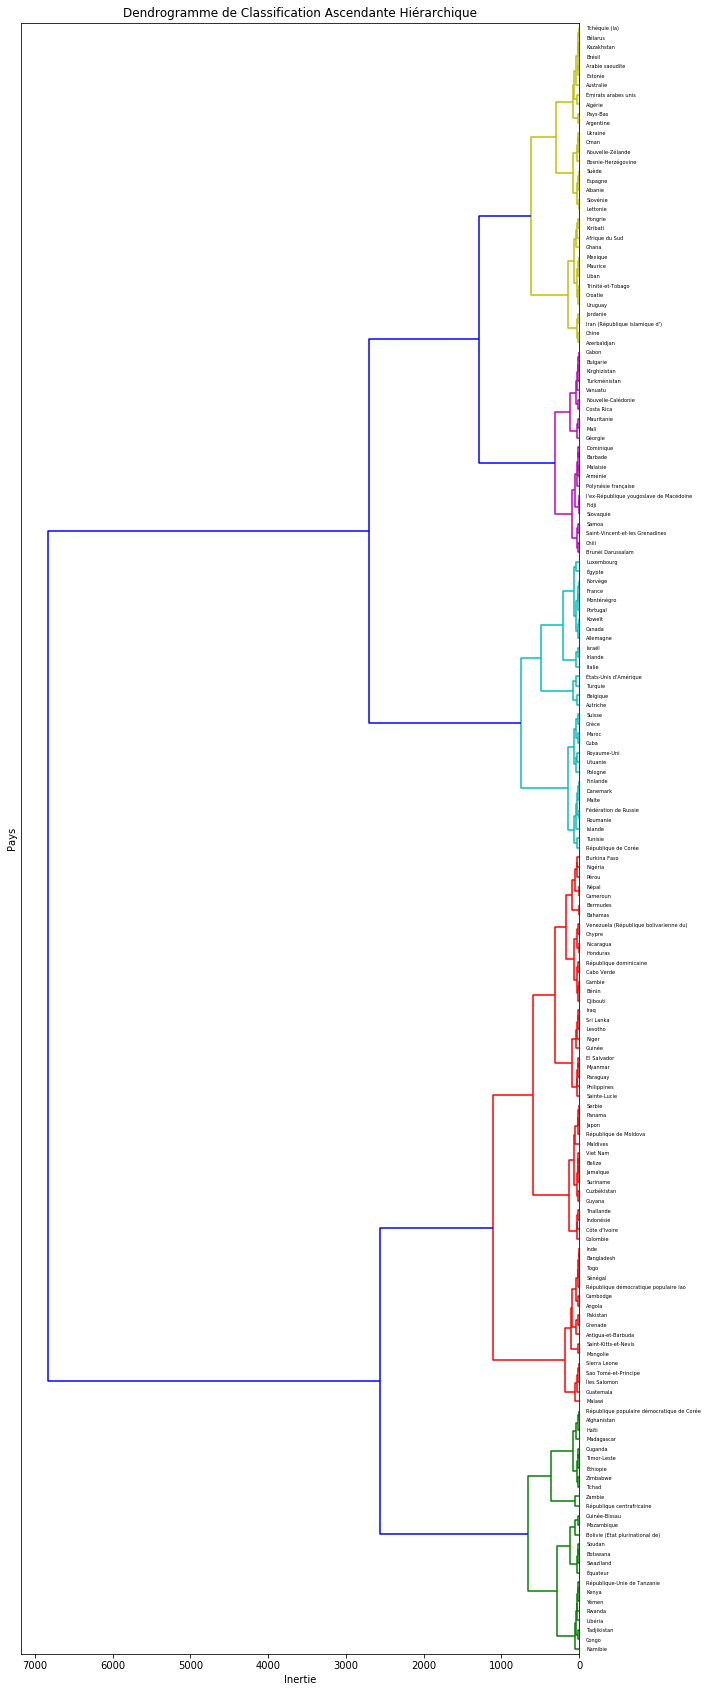

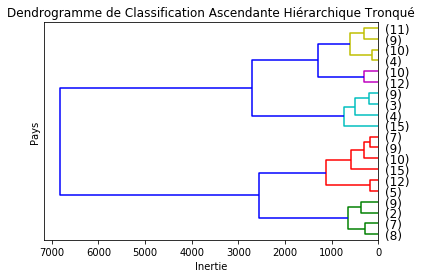

In [23]:

X = df_base.values 
#Y = ssd.pdist(X) #Ne prend pas de str
Z = sch.linkage(X,method='ward',metric='euclidean')
#La méthode de Ward consiste à regrouper les classes de façon que l'augmentation de ...
#...l'inertie interclasse soit maximum, ou ce qui revient au même d'après le théorème de Huygens,..
#...de façon que l'augmentation de l'inertie intraclasse soit minimum

plt.figure(figsize=(10,30))
plt.title('Dendrogramme de Classification Ascendante Hiérarchique')
plt.xlabel("Inertie")
plt.ylabel('Pays')
entire_dendro = sch.dendrogram(Z,labels = df_base.index,color_threshold=1200, orientation='left')
plt.show(entire_dendro)

plt.title('Dendrogramme de Classification Ascendante Hiérarchique Tronqué')
plt.xlabel("Inertie")
plt.ylabel('Pays')
truncate_dendro = sch.dendrogram(Z,labels = df_base.index,color_threshold=1200, orientation='left', p=20, truncate_mode='lastp')
plt.show(truncate_dendro)

# Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

## Caractérisez chacun de ces groupes selon les variables cités précédemment

Caratérisez chacun des groupes = Analyse Univarié ou Bivarié pour chacun des groupes pour trouver des critéres de distinctions

### Decoupage en classes - Matérialisation des groupes

In [24]:
#découpage á la hauteur t=46 --> identifiants de 5 groupes
groupes_cah = sch.fcluster(Z,t=1200,criterion='distance')
print(groupes_cah)



[4 1 5 5 2 2 5 5 3 2 4 2 2 1 1 5 2 2 4 4 2 2 3 2 1 2 1 4 2 1 4 3 2 5 2 3 4
 2 5 1 3 2 5 4 3 3 4 2 4 4 2 3 5 5 5 3 2 2 2 2 1 2 5 5 3 2 2 5 2 3 3 3 2 5
 2 2 5 4 1 2 1 3 3 5 2 5 2 1 3 1 2 4 2 4 3 4 5 5 2 3 1 2 1 2 5 4 4 4 5 2 2
 2 3 2 2 5 2 2 2 3 3 1 1 1 3 1 3 2 2 4 2 5 2 2 5 4 5 5 2 1 1 5 3 4 1 2 2 5
 5 3 3 5 1 3 5 3 2 5 2 2 2 1 4 1 1 3 3 2 3 1 5]


In [25]:
#index triés des groupes
idg = np.argsort(groupes_cah)

In [26]:
#affichage des observations et leurs groupes
df_groupes_cah = pd.DataFrame(df_base.index[idg],groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'groupe_cah'})
print(df_groupes_cah)

     groupe_cah                                        Pays
0             1                                    Éthiopie
1             1                                  Madagascar
2             1                               Guinée-Bissau
3             1                                     Ouganda
4             1                                 Timor-Leste
5             1                                    Équateur
6             1                                    Zimbabwe
7             1                                      Rwanda
8             1                                       Yémen
9             1                                       Haïti
10            1                                     Libéria
11            1                                       Congo
12            1                                       Tchad
13            1                                   Swaziland
14            1                                      Zambie
15            1                   Républ

In [27]:
#Réindexation df_base pour jointure
df_base.reset_index(inplace=True)

In [28]:
joint_df_base_cah_group = pd.merge(df_groupes_cah,df_base)
joint_df_base_cah_group

,groupe_cah,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,1,Éthiopie,2.585878,2129.0,60.39,12.733896
1,1,Madagascar,2.830358,2056.0,46.69,21.503534
2,1,Guinée-Bissau,2.403846,2288.0,44.05,20.408627
3,1,Ouganda,3.392395,2126.0,52.64,23.537234
4,1,Timor-Leste,1.705566,2129.0,57.51,31.333681
5,1,Équateur,1.587916,2346.0,61.30,59.624796
6,1,Zimbabwe,3.104051,2113.0,48.32,24.482616
7,1,Rwanda,2.784081,2224.0,56.79,9.860891
8,1,Yémen,2.326849,2217.0,58.90,23.684211
9,1,Haïti,1.405544,2089.0,47.70,21.299790


### Construction des dataframes de chaque groupe

In [29]:
df_groupe1 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==1]
df_groupe2 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==2]
df_groupe3 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==3]
df_groupe4 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==4]
df_groupe5 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==5]

### Analyse univariée

In [30]:
def analyse_univarie(data,moncaract='',typecaract=''):
    """Construit une analyse univarie selon le type de variable
    - Distribution empirique 
    - Représentation 
    - Mesure de tendance centrale 
    - Mesure de dispersion 
    - Mesure de concentration (cas continue)"""

    
    if typecaract=='qtedisc': # Variable quantitative discrète
        #Construction du tableau de distribution
        effectifs = data[moncaract].value_counts()

        modalites = effectifs.index # l'index de effectifs contient les modalités
        tab = pd.DataFrame(modalites, columns = [moncaract]) #création du tableau à partir des modalités

        tab["n"] = effectifs.values

        tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

        tab = tab.sort_values(moncaract) # tri des valeurs de la variable X (croissant)
        tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
        
        moyenne = data[moncaract].mean()
        mediane = data[moncaract].median()
        mode = data[moncaract].mode()
        
        mesure_tendance_centrale = """Variable {} :
        - Moyenne = {}
        - Médiane = {}
        - Mode = {}""".format(moncaract,moyenne,mediane,mode)
        
        variance = data[moncaract].var(ddof=0)
        ecart_type = data[moncaract].std(ddof=0)
        mesure_dispersion = """Variable {} :
        - Variance = {}
        - Ecart-type = {}""".format(moncaract,variance,ecart_type)
        
        #Représentation
        representation = str(input("Choisir représentation : Diagramme en bâtons ('diagbat') ou Courbe cumulative ('courbcum') :"))
        
        if representation == 'diagbat':
            abcisses = moncaract
            question = str(input('Voulez-vous afficher les couleurs ? (y/n)'))
            if question == 'y':
                print(cmaps)
            else:
                print('affichage des couleurs non demandé')
            choix_couleur = str(input('Choisir couleur du graphique :'))
            if not(choix_couleur):
                choix_couleur=None
            tab_plot = tab.plot(x=abcisses,y='n',kind='bar', figsize=(20,10), colormap=choix_couleur)
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            legend = str(input("Donner le nom de la légende du graphique :"))
            plt.legend(title=legend, loc='upper left')
            
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            if not(ylabel):
                plt.ylabel('Effectifs')
            else:
                plt.ylabel(ylabel)
        
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            if not(xlabel):
                plt.xlabel(moncaract)
            else:
                plt.xlabel(xlabel)
            
            plt.show(tab_plot)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image =='y': 
                image= tab_plot.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            return tab
        else:
            abcisses = moncaract
            question = str(input('Voulez-vous afficher les couleurs ? (y/n)'))
            if question == 'y':
                print(cmaps)
            else:
                print('affichage des couleurs non demandé')
            choix_couleur = str(input('Choisir couleur du graphique :'))
            if not(choix_couleur):
                choix_couleur=None
            tab_plot = tab.plot(x=abcisses,y='F',kind='line', figsize=(20,10), colormap=choix_couleur)
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            legend = str(input("Donner le nom de la légende du graphique :"))
            plt.legend(title=legend, loc='upper left')
            
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            if not(ylabel):
                plt.ylabel('Fréquences cumulées')
            else:
                plt.ylabel(ylabel)
        
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            if not(xlabel):
                plt.xlabel(moncaract)
            else:
                plt.xlabel(xlabel)
            
            
            
            plt.show(tab_plot)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image == 'y': 
                image= tab_plot.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            return tab
        
    elif typecaract=='qtecont': # Variable quantitative continue
        #Construction du tableau de distribution
        
        effectifs = data[moncaract].value_counts()

        modalites = effectifs.index # l'index de effectifs contient les modalités
        tab = pd.DataFrame(modalites, columns = [moncaract]) #création du tableau à partir des modalités

        tab["n"] = effectifs.values

        tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
        
        

        tab = tab.sort_values(moncaract) # tri des valeurs de la variable X (croissant)
        tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
        
        moyenne = data[moncaract].mean()
        mediane = data[moncaract].median()
        mode = data[moncaract].mode()
        
        mesure_tendance_centrale = """Variable {} :
        - Moyenne = {}
        - Médiane = {}
        - Mode = {}""".format(moncaract,moyenne,mediane,mode)
        
        variance = data[moncaract].var(ddof=0)
        ecart_type = data[moncaract].std(ddof=0)
        mesure_dispersion = """Variable {} :
        - Variance = {}
        - Ecart-type = {}""".format(moncaract,variance,ecart_type)
       
    
        question = str(input("Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)"))
        if question == 'y':
            #Mesure de concentration

            echantillon = data[moncaract]
            #Sélection du sous-échantillon de travail que l'on appelle  revenus
            ech = echantillon.values
            #On place les observations dans une variable
            lorenz = np.cumsum(np.sort(ech)) / ech.sum()

            lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

            plot_lorenz = plt.figure()
            question = str(input('Voulez-vous afficher les couleurs ? (y/n)'))
            if question == 'y':
                print(matplotlib.colors.cnames.items())
            else:
                print('affichage des couleurs non demandé')
            choix_couleur = str(input('Choisir couleur du graphique :'))
            if not(choix_couleur):
                choix_couleur=None
            plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',color=choix_couleur)

            titre_lorenz = 'Courbe de Lorenz'
            plt.title(titre_lorenz)
            ylabel_lorenz = 'F(N,x)'
            plt.ylabel(ylabel_lorenz)
            xlabel_lorenz = 'F(x)'
            plt.xlabel(xlabel_lorenz)


            #Indice de Gini
            aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
            S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
            gini = 2*S

            plt.show(plot_lorenz)
            save_image_lorenz = str(input("Sauvegarder la courbe de lorenz ? (y/n) :"))
            if save_image_lorenz =='y': 
                image_lorenz= plot_lorenz.get_figure()
                image_lorenz.savefig('Images/{}'.format(titre_lorenz))
            print("L'indice de Gini est égal à {}".format(gini))
        else:
            print("Mesure de concentration non affichée")
        #indice de Huntsberger : Pour connaitre le nombre ideal de classes pour la distribution

        #N(cl) = 1 + 3,3 log10(N)
        #N = nombre d’observations
        #N(cl) = nombre de classes
        N= data[moncaract].values.sum()
        nombre_classe = 1 + 3.3*mth.log10(N)
        nombre_classe = round(nombre_classe)
        tab[moncaract]= pd.cut(tab[moncaract],bins=nombre_classe)
        
        #Représentation
        representation = str(input("Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :"))
        if representation == 'boxplot':
            abcisses = moncaract
            outliers = str(input("Afficher les outliers (y/n) :"))
            if outliers == 'y':
                outliers = True
            plot_data = data.boxplot(column=abcisses,vert=False, showfliers=outliers)
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            
        
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            if not(xlabel):
                plt.xlabel(moncaract)
            else:
                plt.xlabel(xlabel)
            
            
            plt.show(plot_data)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image == 'y': 
                image= plot_data.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            upper_quartile = np.percentile(data[moncaract], 75)
            lower_quartile = np.percentile(data[moncaract], 25)

            iqr = upper_quartile - lower_quartile
            upper_whisker = data[moncaract] [data[moncaract]<=upper_quartile+1.5*iqr].max()
            lower_whisker = data[moncaract] [data[moncaract]>=lower_quartile-1.5*iqr].min()
            print("""La mediane est {}, Q1 est égal à {} et Q3 est égal à {} 
            L'écart inter-quartile est égal à {} et les bornes sont respectivement de {} à {}""".format(mediane, lower_quartile,upper_quartile,iqr,lower_whisker,upper_whisker))
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            
            return tab
        
        if representation == 'hist':
            abcisses = moncaract
            question = str(input('Voulez-vous afficher les couleurs ? (y/n)'))
            if question == 'y':
                print(matplotlib.colors.cnames.items())
            else:
                print('affichage des couleurs non demandé')
            choix_couleur = str(input('Choisir couleur du graphique :'))
            if not(choix_couleur):
                choix_couleur=None
            
            plot_data = data[moncaract].hist(density=True, bins=nombre_classe,color=choix_couleur)
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            if not(ylabel):
                plt.ylabel('Fréquences')
            else:
                plt.ylabel(ylabel)
        
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            if not(xlabel):
                plt.xlabel(moncaract)
            else:
                plt.xlabel(xlabel)
            
            
            
            plt.show(plot_data)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image == 'y': 
                image= plot_data.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            
            return tab
    elif typecaract=='qual':
        #Construction du tableau de distribution
        effectifs = data[moncaract].value_counts()

        modalites = effectifs.index # l'index de effectifs contient les modalités
        tab = pd.DataFrame(modalites, columns = [moncaract]) #création du tableau à partir des modalités

        tab["n"] = effectifs.values

        tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

        #Représentation
        representation = str(input("Choisir représentation : Camenbert ('camenb') ou Tuyau d'orgue ('tuyau') :"))
        
        if representation == 'camenb':
            abcisses = moncaract
            question = str(input('Voulez-vous afficher les couleurs ? (y/n)'))
            if question == 'y':
                print(cmaps)
            else:
                print('affichage des couleurs non demandé')
            choix_couleur = str(input('Choisir couleur du graphique :'))
            if not(choix_couleur):
                choix_couleur=None
            tab_plot = tab['f'].plot(kind='pie',autopct = lambda x: str(round(x, 2)) + '%', colormap=choix_couleur)
            plt.axis('equal')
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            if not(ylabel):
                plt.ylabel(moncaract)
            else:
                plt.ylabel(ylabel)
        
           
            
            plt.show(tab_plot)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image =='y': 
                image= tab_plot.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            return tab
        elif representation == 'tuyau':
            abcisses = moncaract
            question = str(input('Voulez-vous afficher les couleurs ? (y/n)'))
            if question == 'y':
                print(cmaps)
            else:
                print('affichage des couleurs non demandé')
            choix_couleur = str(input('Choisir couleur du graphique :'))
            if not(choix_couleur):
                choix_couleur=None
            tab_plot = tab.plot(x=abcisses,y='n',kind='bar', figsize=(20,10), colormap=choix_couleur)
            titre = str(input("Donner le nom du titre du graphique :"))
            plt.title(titre)
            legend = str(input("Donner le nom de la légende du graphique :"))
            plt.legend(title=legend, loc='upper left')
            
            ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
            if not(ylabel):
                plt.ylabel('Effectifs')
            else:
                plt.ylabel(ylabel)
        
            xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
            if not(xlabel):
                plt.xlabel(moncaract)
            else:
                plt.xlabel(xlabel)
                
            plt.show(tab_plot)
            save_image = str(input("Sauvegarder l'image ? (y/n) :"))
            if save_image == 'y': 
                image= tab_plot.get_figure()
                image.savefig('Images/{}'.format(titre))
            else:
                print("Pas de sauvegarde")
            print(mesure_tendance_centrale)
            print(mesure_dispersion)
            return tab
        
    else:
        print("""Erreur : Insérer un type de variable parmi les choix suivants :
              - Variable quantitative discrète 'qtedisc' 
              - Variable quantitative continue 'qtecont' 
              - Variable quantitative 'qtequal'""")

#### Groupe 1

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)y
dict_items([('deepskyblue', '#00BFFF'), ('mediumspringgreen', '#00FA9A'), ('darkslateblue', '#483D8B'), ('blanchedalmond', '#FFEBCD'), ('darkgrey', '#A9A9A9'), ('brown', '#A52A2A'), ('indigo', '#4B0082'), ('mediumturquoise', '#48D1CC'), ('thistle', '#D8BFD8'), ('turquoise', '#40E0D0'), ('blueviolet', '#8A2BE2'), ('lightyellow', '#FFFFE0'), ('lightsalmon', '#FFA07A'), ('darkgoldenrod', '#B8860B'), ('deeppink', '#FF1493'), ('cyan', '#00FFFF'), ('olivedrab', '#6B8E23'), ('lavenderblush', '#FFF0F5'), ('bisque', '#FFE4C4'), ('firebrick', '#B22222'), ('whitesmoke', '#F5F5F5'), ('slategray', '#708090'), ('lightblue', '#ADD8E6'), ('sandybrown', '#F4A460'), ('navajowhite', '#FFDEAD'), ('palevioletred', '#DB7093'), ('cornflowerblue', '#6495ED'), ('mediumseagreen', '#3CB371')

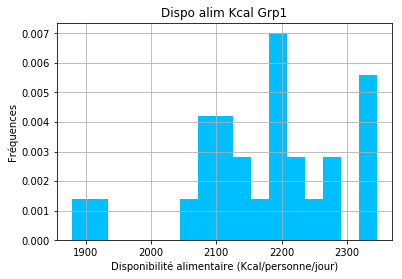

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Moyenne = 2173.576923076923
        - Médiane = 2201.5
        - Mode = 0    2129.0
1    2206.0
dtype: float64
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Variance = 13072.782544378699
        - Ecart-type = 114.33626959271804


,Disponibilité alimentaire (Kcal/personne/jour),n,f,F
14,"(1878.533, 1906.471]",1,0.038462,0.038462
13,"(1906.471, 1933.941]",1,0.038462,0.076923
3,"(2043.824, 2071.294]",1,0.038462,0.115385
19,"(2071.294, 2098.765]",1,0.038462,0.153846
10,"(2071.294, 2098.765]",1,0.038462,0.192308
12,"(2071.294, 2098.765]",1,0.038462,0.230769
11,"(2098.765, 2126.235]",1,0.038462,0.269231
7,"(2098.765, 2126.235]",1,0.038462,0.307692
5,"(2098.765, 2126.235]",1,0.038462,0.346154
0,"(2126.235, 2153.706]",2,0.076923,0.423077


In [355]:
analyse_univarie(df_groupe1,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (Bool) :False
Donner le nom du titre du graphique :Box plot Evolution population 2012/2013
Donner le nom de l'axe des abcisses du graphique :


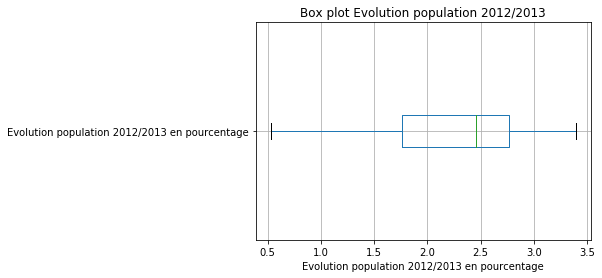

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 2.459826313799475, Q1 est égal à 1.7661152716085518 et Q3 est égal à 2.768963054947541 
            L'écart inter-quartile est égal à 1.0028477833389893 et les bornes sont respectivement de 0.5330533457174056 à 3.3923953117261902
Variable Evolution population 2012/2013 en pourcentage :
        - Moyenne = 2.2822131268820276
        - Médiane = 2.459826313799475
        - Mode = 0     0.533053
1     0.848303
2     1.405544
3     1.543461
4     1.587916
5     1.667302
6     1.705566
7     1.947764
8     2.011050
9     2.067482
10    2.326849
11    2.403846
12    2.437552
13    2.482100
14    2.484705
15    2.503670
16    2.559373
17    2.585878
18    2.723609
19    2.784081
20    2.830358
21    3.028599
22    3.076408
23    3.104051
24    3.296625
25    3.392395
dtype: float64
Variable Evolution population 2012/2013 en pourcentage :
        - Variance = 0.5025402827949551
        - Ecart-type = 0.7089007566612939


,Evolution population 2012/2013 en pourcentage,n,f,F
12,"(0.53, 0.942]",1,0.038462,0.038462
24,"(0.53, 0.942]",1,0.038462,0.076923
6,"(1.35, 1.758]",1,0.038462,0.115385
25,"(1.35, 1.758]",1,0.038462,0.153846
14,"(1.35, 1.758]",1,0.038462,0.192308
0,"(1.35, 1.758]",1,0.038462,0.230769
19,"(1.35, 1.758]",1,0.038462,0.269231
3,"(1.758, 2.167]",1,0.038462,0.307692
20,"(1.758, 2.167]",1,0.038462,0.346154
23,"(1.758, 2.167]",1,0.038462,0.384615


In [377]:
analyse_univarie(df_groupe1,'Evolution population 2012/2013 en pourcentage','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :
Donner le nom du titre du graphique :
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


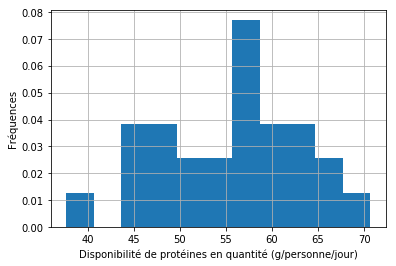

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité de protéines en quantité (g/personne/jour) :
        - Moyenne = 55.65423076923077
        - Médiane = 57.55999999999999
        - Mode = 0     37.66
1     44.05
2     45.68
3     46.04
4     46.69
5     47.70
6     48.32
7     51.41
8     52.64
9     54.99
10    55.22
11    56.79
12    57.51
13    57.61
14    57.76
15    58.26
16    58.59
17    58.90
18    60.39
19    61.30
20    61.87
21    62.75
22    63.38
23    64.85
24    65.96
25    70.69
dtype: float64
Variable Disponibilité de protéines en quantité (g/personne/jour) :
        - Variance = 59.010539792899436
        - Ecart-type = 7.681831799310594


,Disponibilité de protéines en quantité (g/personne/jour),n,f,F
21,"(37.627, 40.663]",1,0.038462,0.038462
10,"(43.665, 46.668]",1,0.038462,0.076923
15,"(43.665, 46.668]",1,0.038462,0.115385
24,"(43.665, 46.668]",1,0.038462,0.153846
9,"(46.668, 49.671]",1,0.038462,0.192308
12,"(46.668, 49.671]",1,0.038462,0.230769
17,"(46.668, 49.671]",1,0.038462,0.269231
22,"(49.671, 52.674]",1,0.038462,0.307692
19,"(49.671, 52.674]",1,0.038462,0.346154
14,"(52.674, 55.676]",1,0.038462,0.384615


In [378]:
analyse_univarie(df_groupe1,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (Bool) :False
Donner le nom du titre du graphique :
Donner le nom de l'axe des abcisses du graphique :


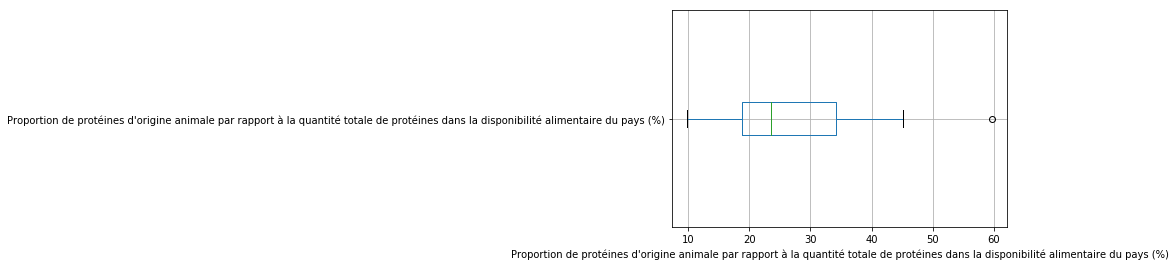

Sauvegarder l'image ? (y/n) :
Pas de sauvegarde
La mediane est 23.610722284434495, Q1 est égal à 18.836471970241618 et Q3 est égal à 34.192682633450715 
            L'écart inter-quartile est égal à 15.356210663209097 et les bornes sont respectivement de 9.86089100193696 à 45.194057004245
Variable Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%) :
        - Moyenne = 27.232616704004563
        - Médiane = 23.610722284434495
        - Mode = 0      9.860891
1     12.733896
2     13.879159
3     15.505976
4     16.751177
5     17.641967
6     18.312420
7     20.408627
8     20.992104
9     21.299790
10    21.503534
11    21.773765
12    23.537234
13    23.684211
14    24.482616
15    25.715209
16    30.295272
17    31.333681
18    33.559482
19    34.403749
20    37.206777
21    41.603701
22    43.357323
23    43.386618
24    45.194057
25    59.624796
dtype: float64
Variable Proportion de protéines d'orig

,Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),n,f,F
22,"(9.811, 14.837]",1,0.038462,0.038462
12,"(9.811, 14.837]",1,0.038462,0.076923
4,"(9.811, 14.837]",1,0.038462,0.115385
13,"(14.837, 19.814]",1,0.038462,0.153846
3,"(14.837, 19.814]",1,0.038462,0.192308
7,"(14.837, 19.814]",1,0.038462,0.230769
15,"(14.837, 19.814]",1,0.038462,0.269231
8,"(19.814, 24.79]",1,0.038462,0.307692
16,"(19.814, 24.79]",1,0.038462,0.346154
18,"(19.814, 24.79]",1,0.038462,0.384615


In [379]:
analyse_univarie(df_groupe1,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 2

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :firebrick
Donner le nom du titre du graphique :
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


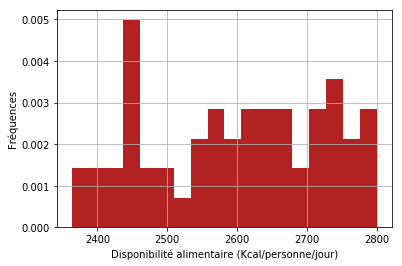

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Moyenne = 2599.810344827586
        - Médiane = 2610.0
        - Mode = 0    2416.0
1    2453.0
dtype: float64
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Variance = 15551.63644470868
        - Ecart-type = 124.70620050626464


,Disponibilité alimentaire (Kcal/personne/jour),n,f,F
10,"(2363.564, 2388.222]",1,0.017241,0.017241
34,"(2363.564, 2388.222]",1,0.017241,0.034483
12,"(2388.222, 2412.444]",1,0.017241,0.051724
31,"(2388.222, 2412.444]",1,0.017241,0.068966
0,"(2412.444, 2436.667]",2,0.034483,0.103448
53,"(2436.667, 2460.889]",1,0.017241,0.120690
51,"(2436.667, 2460.889]",1,0.017241,0.137931
13,"(2436.667, 2460.889]",1,0.017241,0.155172
1,"(2436.667, 2460.889]",2,0.034483,0.189655
22,"(2436.667, 2460.889]",1,0.017241,0.206897


In [380]:
analyse_univarie(df_groupe2,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (Bool) :False
Donner le nom du titre du graphique :
Donner le nom de l'axe des abcisses du graphique :


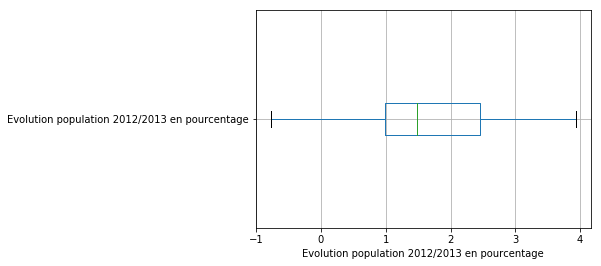

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 1.485439106590455, Q1 est égal à 0.983244816470723 et Q3 est égal à 2.451650238948627 
            L'écart inter-quartile est égal à 1.468405422477904 et les bornes sont respectivement de -0.768355150825272 à 3.928425715451425
Variable Evolution population 2012/2013 en pourcentage :
        - Moyenne = 1.574862402688206
        - Médiane = 1.485439106590455
        - Mode = 0    0.0
dtype: float64
Variable Evolution population 2012/2013 en pourcentage :
        - Variance = 0.95775772050032
        - Ecart-type = 0.9786509697028456


,Evolution population 2012/2013 en pourcentage,n,f,F
9,"(-0.773, -0.0974]",1,0.017241,0.017241
14,"(-0.773, -0.0974]",1,0.017241,0.034483
19,"(-0.0974, 0.574]",1,0.017241,0.051724
0,"(-0.0974, 0.574]",2,0.034483,0.086207
12,"(-0.0974, 0.574]",1,0.017241,0.103448
49,"(-0.0974, 0.574]",1,0.017241,0.120690
29,"(-0.0974, 0.574]",1,0.017241,0.137931
18,"(0.574, 1.245]",1,0.017241,0.155172
24,"(0.574, 1.245]",1,0.017241,0.172414
37,"(0.574, 1.245]",1,0.017241,0.189655


In [381]:
analyse_univarie(df_groupe2,'Evolution population 2012/2013 en pourcentage','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :firebrick
Donner le nom du titre du graphique :
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


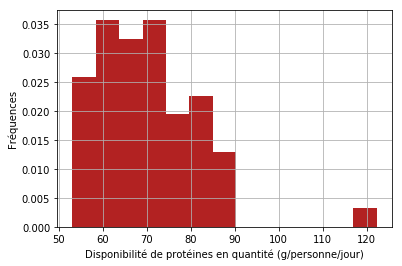

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité de protéines en quantité (g/personne/jour) :
        - Moyenne = 70.38189655172414
        - Médiane = 69.09500000000001
        - Mode = 0      53.10
1      55.86
2      55.86
3      56.11
4      56.31
5      57.27
6      58.16
7      58.32
8      58.45
9      59.65
10     59.76
11     59.91
12     59.91
13     60.85
14     61.31
15     62.20
16     62.86
17     63.60
18     63.73
19     63.77
20     64.31
21     64.38
22     64.53
23     64.78
24     65.45
25     65.62
26     65.66
27     68.89
28     68.99
29     69.20
30     69.54
31     69.96
32     70.58
33     71.36
34     71.72
35     72.32
36     72.96
37     73.20
38     73.48
39     73.59
40     74.92
41     76.93
42     77.54
43     79.27
44     79.32
45     79.37
46     80.80
47     80.93
48     81.61
49     82.21
50     82.61
51     83.41
52     83.49
53     85.74
54     86.16
55     87.65
56     90.36
57    122.32
dtype: float64
Variable Disponibilit

,Disponibilité de protéines en quantité (g/personne/jour),n,f,F
0,"(53.031, 58.425]",1,0.017241,0.017241
46,"(53.031, 58.425]",1,0.017241,0.034483
11,"(53.031, 58.425]",1,0.017241,0.051724
10,"(53.031, 58.425]",1,0.017241,0.068966
20,"(53.031, 58.425]",1,0.017241,0.086207
28,"(53.031, 58.425]",1,0.017241,0.103448
21,"(53.031, 58.425]",1,0.017241,0.120690
35,"(53.031, 58.425]",1,0.017241,0.137931
34,"(58.425, 63.749]",1,0.017241,0.155172
30,"(58.425, 63.749]",1,0.017241,0.172414


In [383]:
analyse_univarie(df_groupe2,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (Bool) :False
Donner le nom du titre du graphique :
Donner le nom de l'axe des abcisses du graphique :


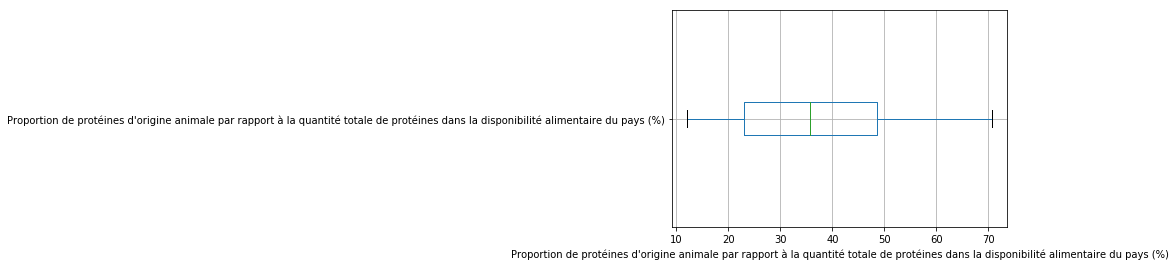

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 35.78830326574462, Q1 est égal à 23.09346799390788 et Q3 est égal à 48.54945918874113 
            L'écart inter-quartile est égal à 25.455991194833253 et les bornes sont respectivement de 12.087401208740122 à 70.66710268149116
Variable Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%) :
        - Moyenne = 37.11419196691041
        - Médiane = 35.78830326574462
        - Mode = 0     12.087401
1     14.060728
2     15.344712
3     15.477497
4     16.640093
5     16.738136
6     17.514970
7     17.776584
8     17.848192
9     18.312122
10    19.996662
11    20.849057
12    21.338366
13    22.289531
14    23.014190
15    23.331301
16    23.404619
17    26.148834
18    26.537159
19    27.359598
20    27.961713
21    28.488746
22    29.165398
23    30.508475
24    30.773655
25    31.166755
26    32.268203
27    35.019782
28    35.485220
29    

,Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),n,f,F
5,"(12.029, 16.969]",1,0.017241,0.017241
57,"(12.029, 16.969]",1,0.017241,0.034483
28,"(12.029, 16.969]",1,0.017241,0.051724
49,"(12.029, 16.969]",1,0.017241,0.068966
56,"(12.029, 16.969]",1,0.017241,0.086207
54,"(12.029, 16.969]",1,0.017241,0.103448
7,"(16.969, 21.851]",1,0.017241,0.120690
44,"(16.969, 21.851]",1,0.017241,0.137931
31,"(16.969, 21.851]",1,0.017241,0.155172
23,"(16.969, 21.851]",1,0.017241,0.172414


In [384]:
analyse_univarie(df_groupe2,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 3

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :crimson
Donner le nom du titre du graphique :
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


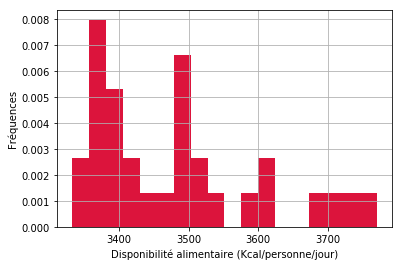

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Moyenne = 3481.967741935484
        - Médiane = 3472.0
        - Mode = 0    3366.0
1    3402.0
2    3499.0
dtype: float64
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Variance = 14223.579604578561
        - Ecart-type = 119.26264966274462


,Disponibilité alimentaire (Kcal/personne/jour),n,f,F
3,"(3332.563, 3357.278]",1,0.032258,0.032258
21,"(3332.563, 3357.278]",1,0.032258,0.064516
22,"(3357.278, 3381.556]",1,0.032258,0.096774
9,"(3357.278, 3381.556]",1,0.032258,0.129032
2,"(3357.278, 3381.556]",2,0.064516,0.193548
10,"(3357.278, 3381.556]",1,0.032258,0.225806
25,"(3357.278, 3381.556]",1,0.032258,0.258065
23,"(3381.556, 3405.833]",1,0.032258,0.290323
13,"(3381.556, 3405.833]",1,0.032258,0.322581
1,"(3381.556, 3405.833]",2,0.064516,0.387097


In [385]:
analyse_univarie(df_groupe3,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (Bool) :False
Donner le nom du titre du graphique :Groupe 3 Evol pop
Donner le nom de l'axe des abcisses du graphique :


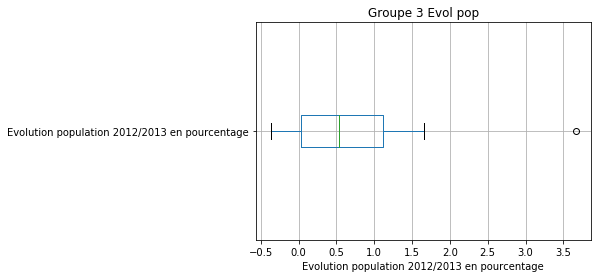

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 0.5305797604228388, Q1 est égal à 0.03234395330996165 et Q3 est égal à 1.1181747849851291 
            L'écart inter-quartile est égal à 1.0858308316751675 et les bornes sont respectivement de -0.3632760898282754 à 1.6525854166150538
Variable Evolution population 2012/2013 en pourcentage :
        - Moyenne = 0.6531977085313858
        - Médiane = 0.5305797604228388
        - Mode = 0    -0.363276
1    -0.257412
2    -0.234686
3    -0.088164
4    -0.044362
5     0.000000
6     0.015702
7     0.026966
8     0.037722
9     0.172456
10    0.233645
11    0.332840
12    0.366257
13    0.375134
14    0.397830
15    0.530580
16    0.553670
17    0.561637
18    0.801877
19    0.981177
20    0.987428
21    1.012880
22    1.114510
23    1.121839
24    1.145038
25    1.164312
26    1.226994
27    1.264916
28    1.497494
29    1.652585
30    3.661538
dtype: float64
Variable Evolution population 2012/2013 en pourcentage :
        - Var

,Evolution population 2012/2013 en pourcentage,n,f,F
26,"(-0.367, 0.442]",1,0.032258,0.032258
28,"(-0.367, 0.442]",1,0.032258,0.064516
29,"(-0.367, 0.442]",1,0.032258,0.096774
27,"(-0.367, 0.442]",1,0.032258,0.129032
8,"(-0.367, 0.442]",1,0.032258,0.161290
2,"(-0.367, 0.442]",1,0.032258,0.193548
18,"(-0.367, 0.442]",1,0.032258,0.225806
22,"(-0.367, 0.442]",1,0.032258,0.258065
15,"(-0.367, 0.442]",1,0.032258,0.290323
7,"(-0.367, 0.442]",1,0.032258,0.322581


In [386]:
analyse_univarie(df_groupe3,'Evolution population 2012/2013 en pourcentage','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :crimson
Donner le nom du titre du graphique :Groupe 3 Dispo prot
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


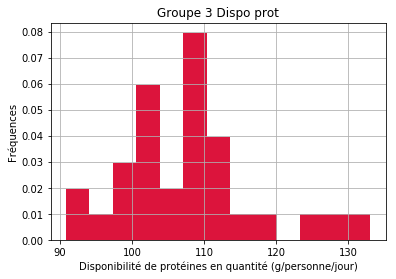

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité de protéines en quantité (g/personne/jour) :
        - Moyenne = 107.55806451612901
        - Médiane = 108.14999999999999
        - Mode = 0      90.86
1      92.89
2      96.12
3      97.88
4      98.49
5      99.37
6     101.39
7     101.46
8     102.81
9     103.00
10    103.14
11    103.22
12    105.06
13    106.20
14    108.12
15    108.15
16    108.49
17    108.65
18    108.74
19    109.42
20    109.91
21    110.31
22    110.50
23    110.73
24    110.87
25    111.90
26    113.64
27    117.56
28    124.36
29    128.00
30    133.06
dtype: float64
Variable Disponibilité de protéines en quantité (g/personne/jour) :
        - Variance = 83.53252528616032
        - Ecart-type = 9.139612972449125


,Disponibilité de protéines en quantité (g/personne/jour),n,f,F
11,"(90.818, 94.106]",1,0.032258,0.032258
17,"(90.818, 94.106]",1,0.032258,0.064516
26,"(94.106, 97.352]",1,0.032258,0.096774
27,"(97.352, 100.598]",1,0.032258,0.129032
21,"(97.352, 100.598]",1,0.032258,0.161290
18,"(97.352, 100.598]",1,0.032258,0.193548
9,"(100.598, 103.845]",1,0.032258,0.225806
4,"(100.598, 103.845]",1,0.032258,0.258065
5,"(100.598, 103.845]",1,0.032258,0.290323
30,"(100.598, 103.845]",1,0.032258,0.322581


In [387]:
analyse_univarie(df_groupe3,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (Bool) :False
Donner le nom du titre du graphique :Groupe 3 prop prot animale dans prot total
Donner le nom de l'axe des abcisses du graphique :


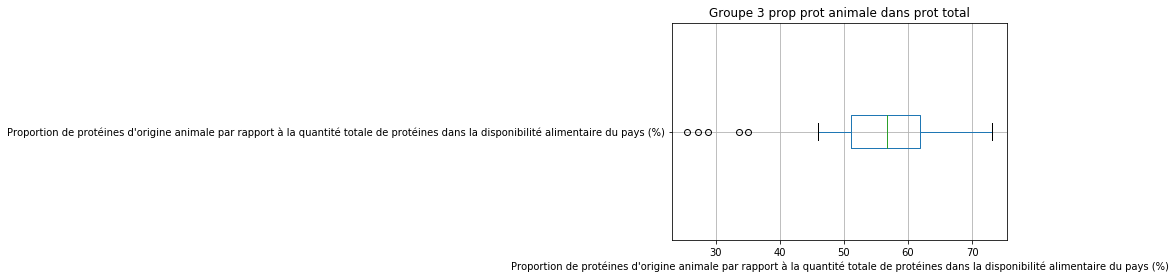

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 56.78284182305631, Q1 est égal à 51.135677571999665 et Q3 est égal à 61.850634609809106 
            L'écart inter-quartile est égal à 10.714957037809441 et les bornes sont respectivement de 45.95145631067962 à 73.05726739816622
Variable Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%) :
        - Moyenne = 53.68952630497119
        - Médiane = 56.78284182305631
        - Mode = 0     25.557063
1     27.247650
2     28.835415
3     33.573807
4     34.998899
5     45.951456
6     47.992093
7     49.958391
8     52.312964
9     52.513306
10    53.682367
11    54.532904
12    54.663943
13    55.969540
14    56.609375
15    56.782842
16    56.893543
17    58.508604
18    58.975525
19    59.284369
20    60.656870
21    60.737801
22    61.522998
23    62.178271
24    62.521266
25    62.832579
26    63.727561
27    63.763480
28    64.199007
29   

,Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),n,f,F
24,"(25.51, 29.515]",1,0.032258,0.032258
14,"(25.51, 29.515]",1,0.032258,0.064516
6,"(25.51, 29.515]",1,0.032258,0.096774
20,"(33.474, 37.432]",1,0.032258,0.129032
27,"(33.474, 37.432]",1,0.032258,0.161290
19,"(45.349, 49.307]",1,0.032258,0.193548
10,"(45.349, 49.307]",1,0.032258,0.225806
9,"(49.307, 53.266]",1,0.032258,0.258065
25,"(49.307, 53.266]",1,0.032258,0.290323
16,"(49.307, 53.266]",1,0.032258,0.322581


In [388]:
analyse_univarie(df_groupe3,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 4

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :purple
Donner le nom du titre du graphique :Groupe 4 Dispo Alim Kcal
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


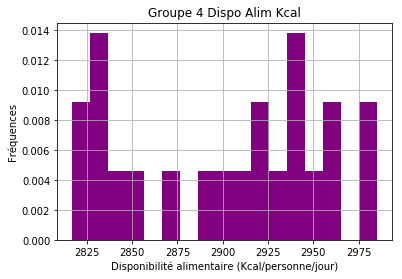

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Moyenne = 2902.2727272727275
        - Médiane = 2918.5
        - Mode = 0    2943.0
dtype: float64
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Variance = 2820.7438016528927
        - Ecart-type = 53.110675025392894


,Disponibilité alimentaire (Kcal/personne/jour),n,f,F
13,"(2816.832, 2826.882]",1,0.045455,0.045455
18,"(2816.832, 2826.882]",1,0.045455,0.090909
6,"(2826.882, 2836.765]",1,0.045455,0.136364
17,"(2826.882, 2836.765]",1,0.045455,0.181818
5,"(2826.882, 2836.765]",1,0.045455,0.227273
20,"(2836.765, 2846.647]",1,0.045455,0.272727
14,"(2846.647, 2856.529]",1,0.045455,0.318182
9,"(2866.412, 2876.294]",1,0.045455,0.363636
11,"(2886.176, 2896.059]",1,0.045455,0.409091
19,"(2896.059, 2905.941]",1,0.045455,0.454545


In [394]:
analyse_univarie(df_groupe4,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Groupe 4 Evol Pop
Donner le nom de l'axe des abcisses du graphique :


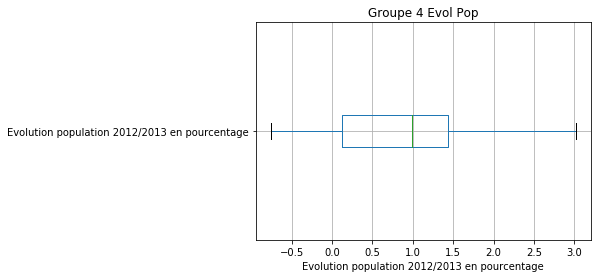

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 0.9911898875958443, Q1 est égal à 0.12244905027308306 et Q3 est égal à 1.4408282230281948 
            L'écart inter-quartile est égal à 1.3183791727551117 et les bornes sont respectivement de -0.7557021159659314 à 3.0160226201696503
Variable Evolution population 2012/2013 en pourcentage :
        - Moyenne = 0.9896831113283856
        - Médiane = 0.9911898875958443
        - Mode = 0    0.0
dtype: float64
Variable Evolution population 2012/2013 en pourcentage :
        - Variance = 0.9527917394446387
        - Ecart-type = 0.9761105159994121


,Evolution population 2012/2013 en pourcentage,n,f,F
18,"(-0.759, -0.00136]",1,0.045455,0.045455
8,"(-0.759, -0.00136]",1,0.045455,0.090909
0,"(-0.00136, 0.753]",2,0.090909,0.181818
10,"(-0.00136, 0.753]",1,0.045455,0.227273
2,"(-0.00136, 0.753]",1,0.045455,0.272727
15,"(-0.00136, 0.753]",1,0.045455,0.318182
20,"(-0.00136, 0.753]",1,0.045455,0.363636
19,"(-0.00136, 0.753]",1,0.045455,0.409091
12,"(-0.00136, 0.753]",1,0.045455,0.454545
5,"(0.753, 1.507]",1,0.045455,0.500000


In [395]:
analyse_univarie(df_groupe4,'Evolution population 2012/2013 en pourcentage','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :purple
Donner le nom du titre du graphique :Groupe 4 Dispo prot
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


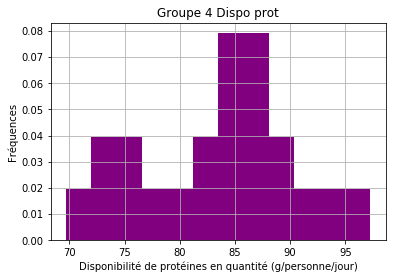

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité de protéines en quantité (g/personne/jour) :
        - Moyenne = 83.52727272727273
        - Médiane = 85.13000000000005
        - Mode = 0     69.69
1     72.11
2     73.53
3     75.05
4     76.28
5     78.37
6     80.50
7     81.57
8     83.41
9     84.94
10    85.13
11    85.13
12    85.53
13    86.27
14    86.28
15    86.61
16    87.32
17    88.76
18    90.06
19    90.50
20    93.29
21    97.27
dtype: float64
Variable Disponibilité de protéines en quantité (g/personne/jour) :
        - Variance = 47.21571983471074
        - Ecart-type = 6.871369574889036


,Disponibilité de protéines en quantité (g/personne/jour),n,f,F
13,"(69.662, 71.988]",1,0.045455,0.045455
1,"(71.988, 74.287]",1,0.045455,0.090909
14,"(71.988, 74.287]",1,0.045455,0.136364
11,"(74.287, 76.585]",1,0.045455,0.181818
8,"(74.287, 76.585]",1,0.045455,0.227273
0,"(76.585, 78.883]",1,0.045455,0.272727
9,"(78.883, 81.182]",1,0.045455,0.318182
19,"(81.182, 83.48]",1,0.045455,0.363636
17,"(81.182, 83.48]",1,0.045455,0.409091
12,"(83.48, 85.778]",1,0.045455,0.454545


In [396]:
analyse_univarie(df_groupe4,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Groupe 4 prop prot animal dans prot tot
Donner le nom de l'axe des abcisses du graphique :


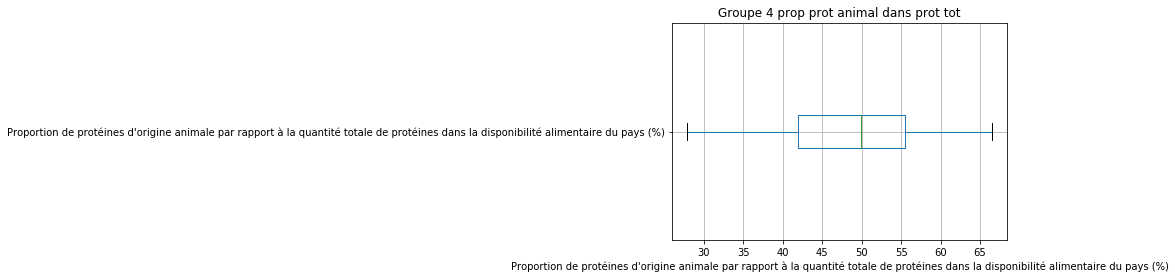

Sauvegarder l'image ? (y/n) :
Pas de sauvegarde
La mediane est 49.89829940599293, Q1 est égal à 41.97904651142511 et Q3 est égal à 55.54008871537664 
            L'écart inter-quartile est égal à 13.56104220395153 et les bornes sont respectivement de 27.886761423704915 à 66.47476097460677
Variable Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%) :
        - Moyenne = 49.35598848011652
        - Médiane = 49.89829940599293
        - Mode = 0     27.886761
1     36.049689
2     40.134212
3     41.242805
4     41.265790
5     41.933702
6     42.115081
7     42.826057
8     48.123473
9     48.592428
10    49.634336
11    50.162262
12    51.415836
13    51.901054
14    54.616922
15    55.187203
16    55.657717
17    57.969772
18    58.370888
19    61.205404
20    63.065591
21    66.474761
dtype: float64
Variable Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la 

,Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),n,f,F
8,"(27.848, 31.395]",1,0.045455,0.045455
11,"(34.903, 38.411]",1,0.045455,0.090909
0,"(38.411, 41.919]",1,0.045455,0.136364
7,"(38.411, 41.919]",1,0.045455,0.181818
20,"(38.411, 41.919]",1,0.045455,0.227273
13,"(41.919, 45.427]",1,0.045455,0.272727
4,"(41.919, 45.427]",1,0.045455,0.318182
3,"(41.919, 45.427]",1,0.045455,0.363636
5,"(45.427, 48.935]",1,0.045455,0.409091
18,"(45.427, 48.935]",1,0.045455,0.454545


In [398]:
analyse_univarie(df_groupe4,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 5

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)green
affichage des couleurs non demandé
Choisir couleur du graphique :green
Donner le nom du titre du graphique :Groupe 5 Dispo alim kcal
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


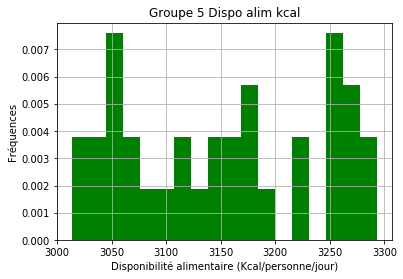

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Moyenne = 3151.470588235294
        - Médiane = 3148.0
        - Mode = 0    3255.0
1    3262.0
dtype: float64
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Variance = 7477.36678200692
        - Ecart-type = 86.47176869942537


,Disponibilité alimentaire (Kcal/personne/jour),n,f,F
12,"(3013.721, 3029.5]",1,0.029412,0.029412
21,"(3013.721, 3029.5]",1,0.029412,0.058824
14,"(3029.5, 3045.0]",1,0.029412,0.088235
13,"(3029.5, 3045.0]",1,0.029412,0.117647
24,"(3045.0, 3060.5]",1,0.029412,0.147059
5,"(3045.0, 3060.5]",1,0.029412,0.176471
15,"(3045.0, 3060.5]",1,0.029412,0.205882
25,"(3045.0, 3060.5]",1,0.029412,0.235294
2,"(3060.5, 3076.0]",1,0.029412,0.264706
17,"(3060.5, 3076.0]",1,0.029412,0.294118


In [399]:
analyse_univarie(df_groupe5,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Groupe 5 Evol pop
Donner le nom de l'axe des abcisses du graphique :


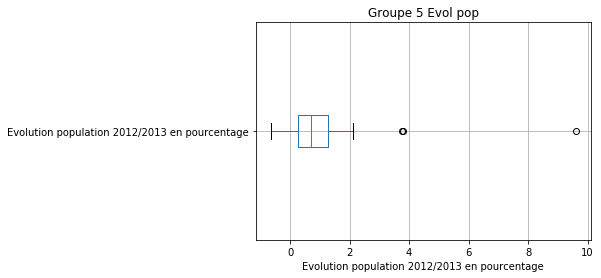

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 0.687661102785917, Q1 est égal à 0.27672084429062593 et Q3 est égal à 1.2605688891460929 
            L'écart inter-quartile est égal à 0.983848044855467 et les bornes sont respectivement de -0.6391390292115062 à 2.1248915871639156
Variable Evolution population 2012/2013 en pourcentage :
        - Moyenne = 1.064610756707163
        - Médiane = 0.687661102785917
        - Mode = 0    -0.639139
1    -0.510367
2    -0.485437
3    -0.394706
4    -0.309837
5    -0.210505
6    -0.130412
7     0.193424
8     0.269235
9     0.299177
10    0.322581
11    0.347881
12    0.353461
13    0.367875
14    0.393996
15    0.612553
16    0.630848
17    0.744474
18    0.858771
19    0.873756
20    0.990099
21    1.031390
22    1.044804
23    1.117198
24    1.228827
25    1.271150
26    1.338585
27    1.520747
28    1.886596
29    1.912472
30    2.124892
31    3.765870
32    3.780853
33    9.595655
dtype: float64
Variable Evolution population

,Evolution population 2012/2013 en pourcentage,n,f,F
22,"(-0.649, 1.067]",1,0.029412,0.029412
29,"(-0.649, 1.067]",1,0.029412,0.058824
31,"(-0.649, 1.067]",1,0.029412,0.088235
4,"(-0.649, 1.067]",1,0.029412,0.117647
26,"(-0.649, 1.067]",1,0.029412,0.147059
23,"(-0.649, 1.067]",1,0.029412,0.176471
25,"(-0.649, 1.067]",1,0.029412,0.205882
6,"(-0.649, 1.067]",1,0.029412,0.235294
1,"(-0.649, 1.067]",1,0.029412,0.264706
3,"(-0.649, 1.067]",1,0.029412,0.294118


In [400]:
analyse_univarie(df_groupe5,'Evolution population 2012/2013 en pourcentage','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :green
Donner le nom du titre du graphique :Groupe 5 Dispo prot
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


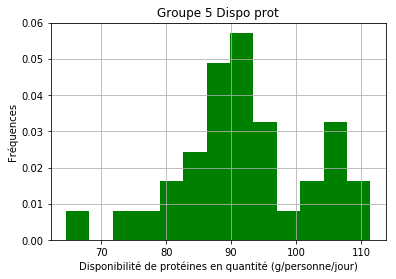

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité de protéines en quantité (g/personne/jour) :
        - Moyenne = 92.10352941176473
        - Médiane = 91.75500000000002
        - Mode = 0      64.57
1      73.34
2      78.75
3      79.58
4      79.59
5      83.33
6      84.27
7      85.33
8      87.25
9      87.41
10     87.58
11     88.20
12     88.21
13     88.63
14     91.34
15     91.50
16     91.59
17     91.92
18     92.33
19     92.39
20     93.11
21     93.78
22     95.01
23     96.02
24     96.35
25     98.05
26    102.60
27    103.65
28    104.51
29    104.76
30    106.26
31    107.48
32    111.37
33    111.46
dtype: float64
Variable Disponibilité de protéines en quantité (g/personne/jour) :
        - Variance = 109.33339930795844
        - Ecart-type = 10.45626124902962


,Disponibilité de protéines en quantité (g/personne/jour),n,f,F
26,"(64.523, 68.177]",1,0.029412,0.029412
20,"(71.784, 75.391]",1,0.029412,0.058824
33,"(75.391, 78.998]",1,0.029412,0.088235
1,"(78.998, 82.605]",1,0.029412,0.117647
19,"(78.998, 82.605]",1,0.029412,0.147059
7,"(82.605, 86.212]",1,0.029412,0.176471
14,"(82.605, 86.212]",1,0.029412,0.205882
27,"(82.605, 86.212]",1,0.029412,0.235294
15,"(86.212, 89.818]",1,0.029412,0.264706
17,"(86.212, 89.818]",1,0.029412,0.294118


In [401]:
analyse_univarie(df_groupe5,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Groupe 5 prop prot animal dans prop tot
Donner le nom de l'axe des abcisses du graphique :


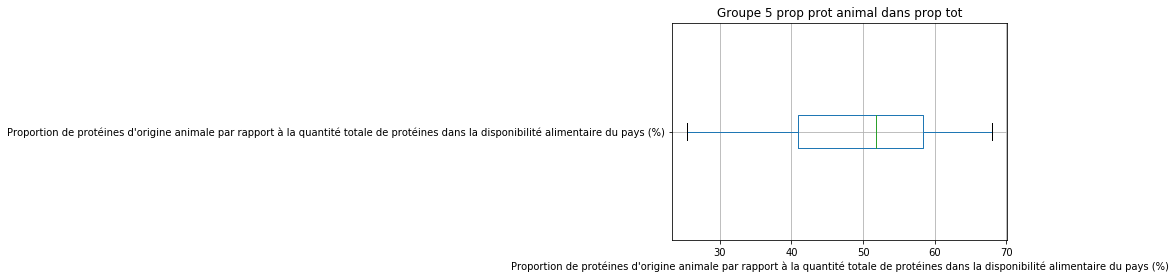

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 51.76512694789619, Q1 est égal à 40.982813940156014 et Q3 est égal à 58.43493546852289 
            L'écart inter-quartile est égal à 17.452121528366874 et les bornes sont respectivement de 25.45558739255014 à 67.97057240265566
Variable Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%) :
        - Moyenne = 49.42938571473742
        - Médiane = 51.76512694789619
        - Mode = 0     25.455587
1     26.715193
2     27.241079
3     32.381055
4     33.475410
5     34.254838
6     36.889056
7     40.082289
8     40.428353
9     42.646197
10    44.207883
11    45.328798
12    46.437543
13    48.281974
14    48.685547
15    51.548480
16    51.722069
17    51.808185
18    53.461435
19    53.485714
20    54.322016
21    55.352068
22    56.076199
23    56.924172
24    57.762270
25    58.659157
26    58.871828
27    59.313779
28    59.429165
29    

,Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),n,f,F
6,"(25.413, 28.999]",1,0.029412,0.029412
16,"(25.413, 28.999]",1,0.029412,0.058824
32,"(25.413, 28.999]",1,0.029412,0.088235
12,"(28.999, 32.541]",1,0.029412,0.117647
29,"(32.541, 36.084]",1,0.029412,0.147059
11,"(32.541, 36.084]",1,0.029412,0.176471
7,"(36.084, 39.627]",1,0.029412,0.205882
23,"(39.627, 43.17]",1,0.029412,0.235294
27,"(39.627, 43.17]",1,0.029412,0.264706
8,"(39.627, 43.17]",1,0.029412,0.294118


In [402]:
analyse_univarie(df_groupe5,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

### Conclusion / Synthèse

In [35]:
df_synthese_moyenne = joint_df_base_cah_group.groupby('groupe_cah').mean()
df_synthese_moyenne

,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
groupe_cah,,,,
1,2.282213,2173.576923,55.654231,27.232617
2,1.574862,2599.810345,70.381897,37.114192
3,0.653198,3481.967742,107.558065,53.689526
4,0.989683,2902.272727,83.527273,49.355988
5,1.064611,3151.470588,92.103529,49.429386


In [37]:
df_synthese_e_type = joint_df_base_cah_group.groupby('groupe_cah').std(ddof=0)
df_synthese_e_type

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Evolution population 2012/2013 en pourcentage,Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
groupe_cah,,,,
1,114.336270,7.681832,0.708901,11.840546
2,124.706201,11.799672,0.978651,16.245572
3,119.262650,9.139613,0.779381,11.755430
4,53.110675,6.871370,0.976111,9.284113
5,86.471769,10.456261,1.800735,11.891562


##### Synthèse variable Dispo alimentaire

Text(0,0.5,'Fréquences')

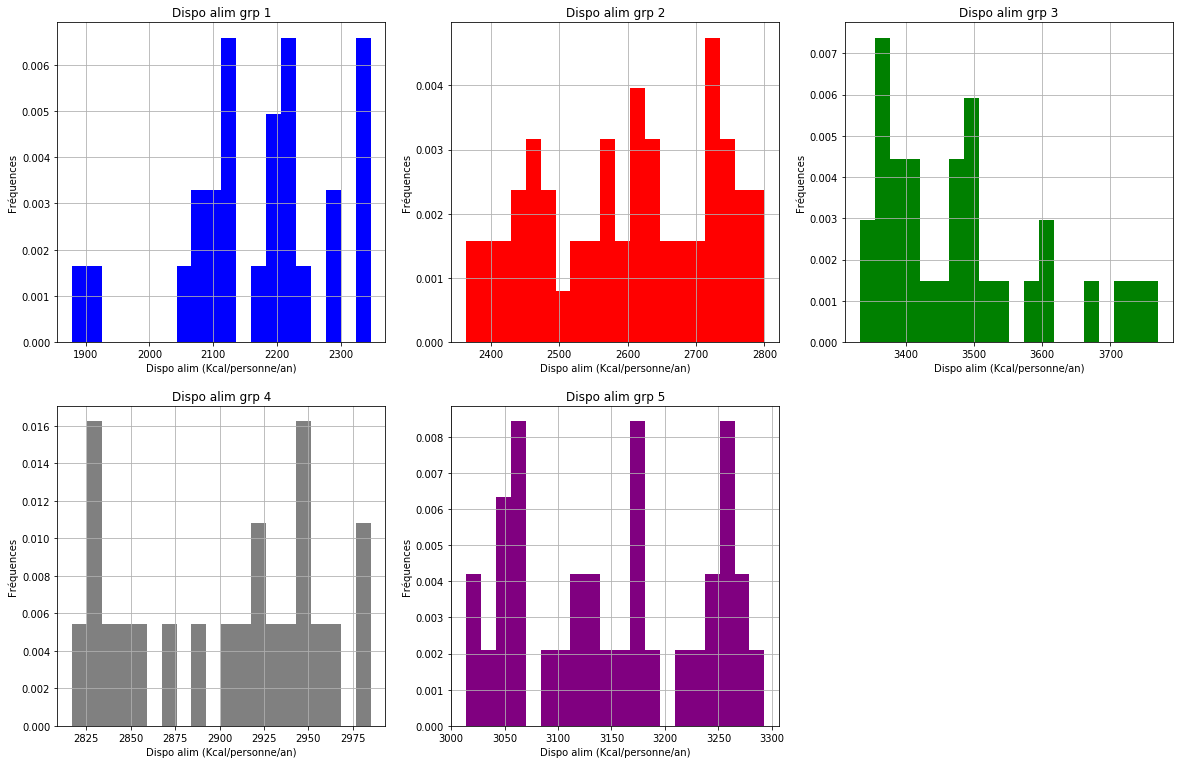

In [52]:
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Dispo alim grp 1')
plot_df_groupe1.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Dispo alim grp 2')
plot_df_groupe2.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Dispo alim grp 3')
plot_df_groupe3.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Dispo alim grp 4')
plot_df_groupe4.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Dispo alim grp 5')
plot_df_groupe5.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe5.set_ylabel('Fréquences')

Le groupe 3 est le groupe qui la plus grande disponibilité alimentaire

##### Synthèse Disponibilité alimentaire en protéine

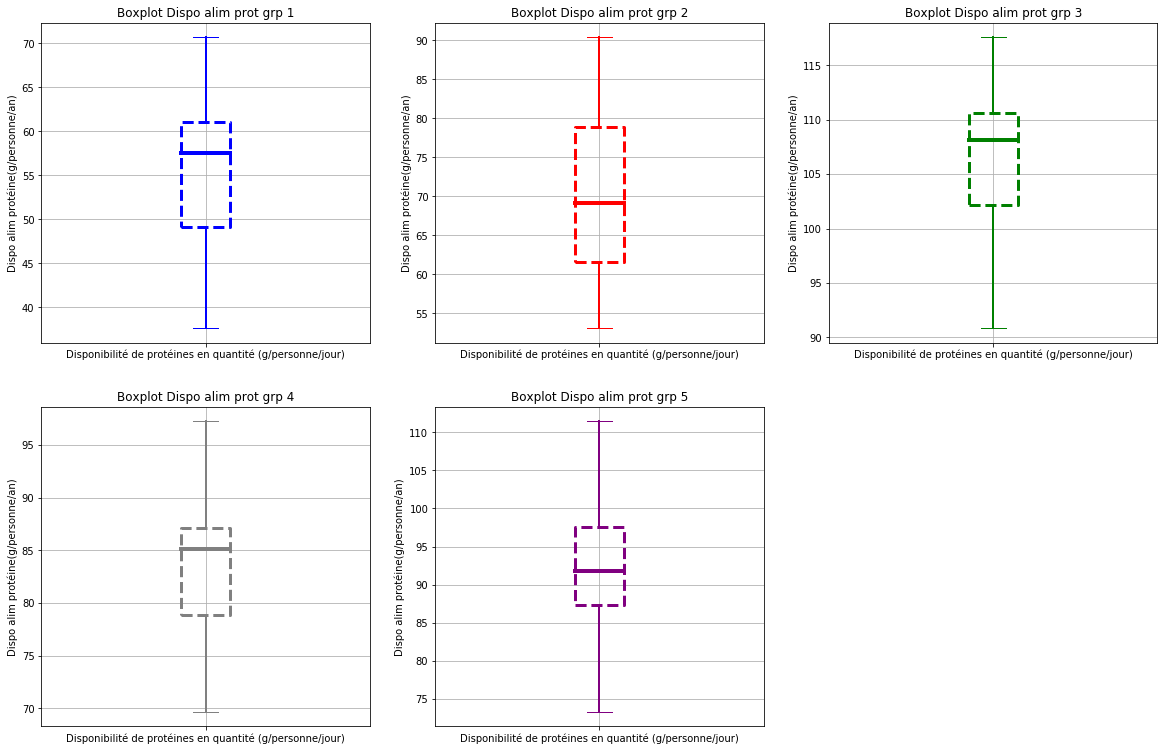

In [77]:
figure = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Dispo alim prot grp 1')
plot_df_groupe1.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Dispo alim prot grp 2')
plot_df_groupe2.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Dispo alim prot grp 3')
plot_df_groupe3.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Dispo alim prot grp 4')
plot_df_groupe4.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Dispo alim prot grp 5')
plot_df_groupe5.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')

Le groupe 3 a la disponibilité alimentaire en protéine la plus forte

##### Synthèse Evolution population

Text(0,0.5,'Fréquences')

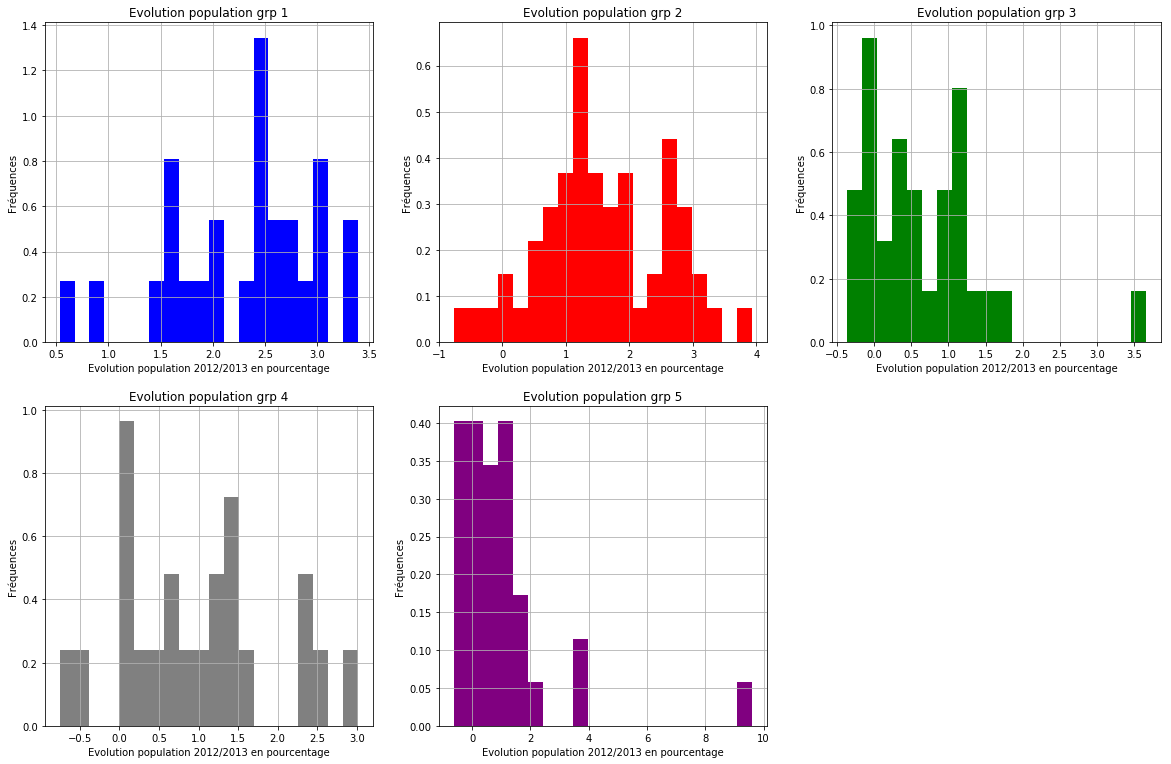

In [78]:
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Evolution population grp 1')
plot_df_groupe1.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Evolution population grp 2')
plot_df_groupe2.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Evolution population grp 3')
plot_df_groupe3.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Evolution population grp 4')
plot_df_groupe4.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Evolution population grp 5')
plot_df_groupe5.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe5.set_ylabel('Fréquences')

Le groupe 5 a la plus forte croissance démographique

##### Synthèse proportion protéine animale dans disponibilité protéine totale

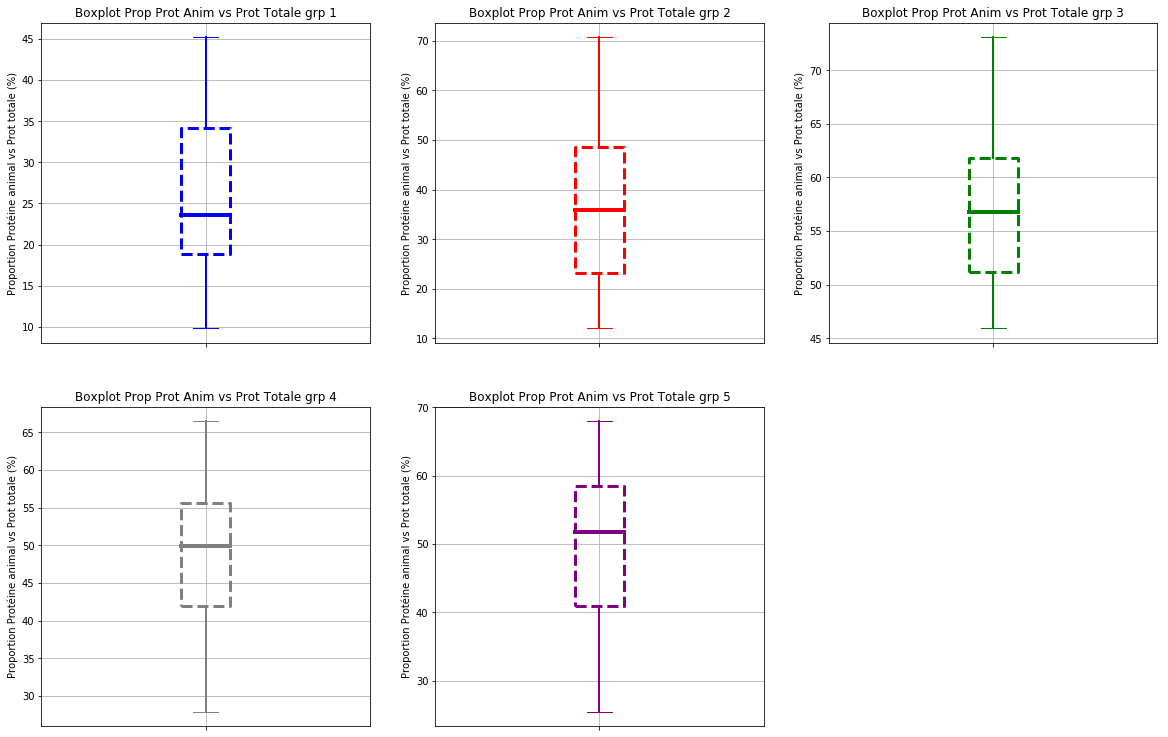

In [87]:
figure = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 1')
plot_df_groupe1.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe1.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 2')
plot_df_groupe2.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe2.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 3')
plot_df_groupe3.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe3.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 4')
plot_df_groupe4.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe4.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 5')
plot_df_groupe5.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe5.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')

Le groupe 3 a la plus forte proportion de protéine animale par rapport la disponibilité de protéine totale

### Analyse bivariée


In [375]:
def analyse_bivariee(data,nomcaract1='',typecaract1='',nomcaract2='',typecaract2=''):
    if typecaract1 == 'qte' and typecaract2 == 'qte':
        
        abcisses = nomcaract1
        ordonnes = nomcaract2
        question = str(input('Voulez-vous afficher les couleurs ? (y/n)'))
        if question == 'y':
            print(matplotlib.colors.cnames.items())
        else:
            print('affichage des couleurs non demandé')
        choix_couleur = str(input('Choisir couleur du graphique :'))
        if not(choix_couleur):
            choix_couleur=None
        data_plot = data.plot(x=abcisses,y=ordonnes,kind='scatter', figsize=(20,10), color=choix_couleur)
        titre = str(input("Donner le nom du titre du graphique :"))
        plt.title(titre)
        legend = str(input("Donner le nom de la légende du graphique :"))
        plt.legend(title=legend, loc='upper left')
        
        ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
        if not(ylabel):
            plt.ylabel(nomcaract2)
        else:
            plt.ylabel(ylabel)
        
        xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
        if not(xlabel):
            plt.xlabel(nomcaract1)
        else:
            plt.xlabel(xlabel)
        
        plt.show(data_plot)
        save_image = str(input("Sauvegarder l'image ? (y/n) :"))
        if save_image =='y': 
            image= tab_plot.get_figure()
            image.savefig('Images/{}'.format(titre))
        else:
            print("Pas de sauvegarde")
        
        # Analyse de la corrélation
        coef_corr_pearson = round(st.pearsonr(data[nomcaract1],data[nomcaract2])[0],2)
        print("Le coeficient de corrélation (Pearson) est égal à {}".format(coef_corr_pearson))
        if coef_corr_pearson < 0.40:
            print('Les variables sont pas corrélées')
        elif coef_corr_pearson > 0.60:
            print('Les variables sont corrélées')
        else:
            seuil_confiance = float(input('Choisir un seuil de confiance 0.1 ou 0.05 :'))
            p_value = round(st.pearsonr(data[nomcaract1],data[nomcaract2])[1],2)
            if p_value < seuil_confiance:
                print('On retient H1 : Les variables sont corrélées')
            else:
                print('On retient H0 : Les variables ne sont pas corrélées')
                
    elif typecaract1 == 'qual' and typecaract2 =='qual':
        
        X = nomcaract1

        Y = nomcaract2


        c = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)

        cont = c.copy()


        tx = data[X].value_counts()

        ty = data[Y].value_counts()


        cont.loc[:,"Total"] = tx

        cont.loc["total",:] = ty

        cont.loc["total","Total"] = len(data)



        tx = pd.DataFrame(tx)


        ty = pd.DataFrame(ty)

        tx.columns = ["foo"]

        ty.columns = ["foo"]

        n = len(data)

        indep = (tx.dot(ty.T) / n)


        c = c.fillna(0) # on remplace les valeurs nulles par des 0

        mesure = (c-indep)**2/indep

        xi_n = mesure.sum().sum()

        d = (mesure/xi_n)
        fig = plt.figure(figsize=(20,20))
        plot = sns.heatmap(d, annot=c)
        titre = plot.set_title('Tableau de contingence coloré')
        plt.show(plot)
        
        save_image = str(input("Sauvegarder l'image ? (y/n) :"))
        if save_image =='y': 
            image= fig.get_figure()
            image.savefig('Images/{}'.format(titre))
        else:
            print("Pas de sauvegarde")
        
        print('Table des coefficients de corrélation :')
        print(xi_n)

        
        
    elif (typecaract1 == 'qte' and typecaract2 == 'qual') or (typecaract1 == 'qual' and typecaract2 == 'qte'):
        # Représentation
        fig= plt.figure(figsize=(20,20))
        abcisses = nomcaract1
        ordonnes = str(input('Choisir variable de mesure (qte) :'))
        teinte= nomcaract2
        color_palette_names = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']
        question = str(input('Voulez-vous afficher les couleurs ? (y/n)'))
        if question == 'y':
            print(color_palette_names)
        else:
            print('affichage des couleurs non demandé')
        choix_couleur = str(input('Choisir couleur du graphique :'))
        if not(choix_couleur):
            choix_couleur=None

        data_plot = sns.barplot(x=abcisses, y=ordonnes,hue=teinte, data=data, palette=sns.color_palette(choix_couleur,2))
        titre = str(input('Choisissez le titre du graphique'))
        data_plot.set_title(titre)
       
        ylabel = str(input("Donner le nom de l'axe des ordonnés du graphique :"))
        if not(ylabel):
            data_plot.set_ylabel(nomcaract2)
        else:
            data_plot.set_ylabel(ylabel)
        
        xlabel = str(input("Donner le nom de l'axe des abcisses du graphique :"))
        if not(xlabel):
            data_plot.set_xlabel(nomcaract1)
        else:
            data_plot.set_xlabel(xlabel)
        plt.show(fig)
        save_image = str(input("Sauvegarder l'image ? (y/n) :"))
        if save_image =='y': 
            image= fig.get_figure()
            image.savefig('Images/{}'.format(titre))
        else:
            print("Pas de sauvegarde")
        
        # Analyse de la corrélation
        x= data[nomcaract1]
        y= data[nomcaract2]
        
        moyenne_y = y.mean()
        classes = []
        for classe in x.unique():
            yi_classe = y[x==classe]
            classes.append({'ni': len(yi_classe),
                            'moyenne_classe': yi_classe.mean()})
        SCT = sum([(yj-moyenne_y)**2 for yj in y])
        SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
        eta_squared= SCE/SCT
        print("Le coeficient de corrélation (eta-squared) est égal à {}".format(eta_squared))
        #if coef_corr_pearson < 0.40:
            #print('Les variables sont pas corrélées')
        #elif coef_corr_pearson > 0.60:
            #print('Les variables sont corrélées')
        #else:
            #seuil_confiance = float(input('Choisir un seuil de confiance 0.1 ou 0.05 :'))
            #p_value = round(st.pearsonr(data[nomcaract1],data[nomcaract2])[1],2)
            #if p_value < seuil_confiance:
                #print('On retient H1 : Les variables sont corrélées')
            #else:
                #print('On retient H0 : Les variables ne sont pas corrélées')
    else:
        print("""Qualitative = 'qual'
        Quantitative = 'qte'""")

## Caractérisez chacun de ces groupes selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

### Ajout de la variable PIB par Habitant

In [238]:
df_base_cah_group=joint_df_base_cah_group.copy()
df_pib_habitant = pd.read_csv('/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/fichiers_csv/pib_habitant_2013.csv')
df_pib_habitant = df_pib_habitant[['Zone','Valeur']] 
df_pib_habitant.columns =['Pays','PiB par habitant (PPA)']
# PPA =  méthode utilisée en économie pour établir une comparaison entre pays du pouvoir d'achat des devises nationales, ce qu’une simple utilisation des taux de change ne permet pas de faire.
df_base_cah_group_pib = pd.merge(df_pib_habitant,df_base_cah_group)
df_base_cah_group_pib

,Pays,PiB par habitant (PPA),groupe_cah,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,Afghanistan,1814.2,1,2.437552,2087.0,58.26,20.992104
1,Afrique du Sud,12445.6,5,0.744474,3020.0,85.33,42.646197
2,Albanie,10504.1,5,0.347881,3188.0,111.37,53.461435
3,Algérie,13253.2,5,1.886596,3293.0,91.92,27.241079
4,Allemagne,42914.5,3,-0.088164,3503.0,101.39,60.656870
5,Angola,6185.0,2,3.126651,2474.0,57.27,32.268203
6,Antigua-et-Barbuda,18862.8,2,1.123596,2416.0,83.49,68.391424
7,Arabie saoudite,49537.6,5,1.912472,3255.0,91.59,44.207883
8,Argentine,19482.2,5,0.873756,3226.0,102.60,65.233918
9,Arménie,7727.9,4,0.269451,2924.0,90.06,48.123473


### Calcul des centroïdes de chacun des groupes (5 groupes)

In [239]:
df_base_cah_group_pib = df_base_cah_group_pib.fillna(0)
df_base_cah_group_pib.dropna(how = 'any')

df_base_cah_group_pib.index = df_base_cah_group_pib['Pays']
del df_base_cah_group_pib['Pays']
del df_base_cah_group_pib['groupe_cah']


In [240]:
df_base_cah_group_pib

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
Pays,,,,,
Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
Albanie,10504.1,0.347881,3188.0,111.37,53.461435
Algérie,13253.2,1.886596,3293.0,91.92,27.241079
Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
Angola,6185.0,3.126651,2474.0,57.27,32.268203
Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
Argentine,19482.2,0.873756,3226.0,102.60,65.233918


In [241]:
X = pd.DataFrame(df_base_cah_group_pib.values)
#y = df_base_cah_group_pib.index

est = KMeans(n_clusters=5)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = pd.DataFrame(est.cluster_centers_[Y['cluster ID']],columns=['centroid_pib', 'centroid_evol','centroid_dispo_alim_kcal','centroid_dispo_prot','centroid_prop'])
result = pd.concat([Y, Z], axis=1)
result.head(10)


,cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,1,3578.438667,1.888701,2531.986667,66.699333,30.627302
1,3,13697.954348,1.031835,2891.239130,83.153913,46.129732
2,3,13697.954348,1.031835,2891.239130,83.153913,46.129732
3,3,13697.954348,1.031835,2891.239130,83.153913,46.129732
4,2,43850.805263,1.117840,3351.315789,104.223684,60.948764
5,1,3578.438667,1.888701,2531.986667,66.699333,30.627302
6,3,13697.954348,1.031835,2891.239130,83.153913,46.129732
7,2,43850.805263,1.117840,3351.315789,104.223684,60.948764
8,3,13697.954348,1.031835,2891.239130,83.153913,46.129732
9,1,3578.438667,1.888701,2531.986667,66.699333,30.627302


In [242]:
df_base_cah_group_pib = df_base_cah_group_pib.reset_index()
df_base_with_centroid = df_base_cah_group_pib.join(result)


In [245]:
df_group_centroid = df_base_with_centroid.groupby('cluster ID').first().reset_index()

#### Pays à cibler avec 5 groupes

In [248]:
pays_a_cibler = df_base_with_centroid[df_base_with_centroid['cluster ID']==4]
pays_a_cibler

,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
25,Brunéi Darussalam,79070.2,1.456311,2985.0,93.29,57.969772,4,73887.38,1.752962,3356.4,106.064,54.783257
46,Émirats arabes unis,62532.7,1.520747,3275.0,104.51,40.082289,4,73887.38,1.752962,3356.4,106.064,54.783257
85,Koweït,74084.5,3.661538,3499.0,108.15,49.958391,4,73887.38,1.752962,3356.4,106.064,54.783257
92,Luxembourg,90950.1,1.145038,3540.0,113.64,63.727561,4,73887.38,1.752962,3356.4,106.064,54.783257
112,Norvège,62799.4,0.981177,3483.0,110.73,62.178271,4,73887.38,1.752962,3356.4,106.064,54.783257


### Calcul des centroides avec 3 groupes

In [250]:
df_base_cah_group_pib2 = df_base_cah_group_pib.copy()

In [252]:
df_base_cah_group_pib2.index = df_base_cah_group_pib2['Pays']
del df_base_cah_group_pib2['Pays']

In [253]:
X = pd.DataFrame(df_base_cah_group_pib2.values)
#y = df_base_cah_group_pib.index

est = KMeans(n_clusters=3)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = pd.DataFrame(est.cluster_centers_[Y['cluster ID']],columns=['centroid_pib', 'centroid_evol','centroid_dispo_alim_kcal','centroid_dispo_prot','centroid_prop'])
result = pd.concat([Y, Z], axis=1)
result.head(10)

,cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,0,5396.082828,1.687777,2608.505051,70.421717,33.897299
1,0,5396.082828,1.687777,2608.505051,70.421717,33.897299
2,0,5396.082828,1.687777,2608.505051,70.421717,33.897299
3,0,5396.082828,1.687777,2608.505051,70.421717,33.897299
4,1,50108.425000,1.250157,3352.375000,104.607083,59.664284
5,0,5396.082828,1.687777,2608.505051,70.421717,33.897299
6,2,21888.070833,0.662599,3073.833333,90.630417,52.160458
7,1,50108.425000,1.250157,3352.375000,104.607083,59.664284
8,2,21888.070833,0.662599,3073.833333,90.630417,52.160458
9,0,5396.082828,1.687777,2608.505051,70.421717,33.897299


In [254]:
df_base_cah_group_pib2 = df_base_cah_group_pib2.reset_index()
df_base_with_centroid2 = df_base_cah_group_pib2.join(result)

In [258]:
df_group_centroid2 = df_base_with_centroid2.groupby('cluster ID').first().reset_index()
df_group_centroid2

,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,0,Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104,5396.082828,1.687777,2608.505051,70.421717,33.897299
1,1,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870,50108.425000,1.250157,3352.375000,104.607083,59.664284
2,2,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424,21888.070833,0.662599,3073.833333,90.630417,52.160458


#### Pays à cibler avec 3 groupes

In [259]:
pays_a_cibler2 = df_base_with_centroid2[df_base_with_centroid2['cluster ID']==1]
pays_a_cibler2

,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
4,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870,1,50108.425,1.250157,3352.375,104.607083,59.664284
7,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883,1,50108.425,1.250157,3352.375,104.607083,59.664284
10,Australie,42920.1,1.271150,3278.0,106.26,67.852437,1,50108.425,1.250157,3352.375,104.607083,59.664284
11,Autriche,44161.5,0.366257,3770.0,106.20,59.284369,1,50108.425,1.250157,3352.375,104.607083,59.664284
17,Belgique,40780.9,0.397830,3737.0,99.37,58.508604,1,50108.425,1.250157,3352.375,104.607083,59.664284
20,Bermudes,50669.3,0.000000,2668.0,90.36,67.319610,1,50108.425,1.250157,3352.375,104.607083,59.664284
25,Brunéi Darussalam,79070.2,1.456311,2985.0,93.29,57.969772,1,50108.425,1.250157,3352.375,104.607083,59.664284
31,Canada,42335.7,0.987428,3499.0,105.06,52.312964,1,50108.425,1.250157,3352.375,104.607083,59.664284
41,Danemark,44564.5,0.375134,3366.0,108.74,64.199007,1,50108.425,1.250157,3352.375,104.607083,59.664284
46,Émirats arabes unis,62532.7,1.520747,3275.0,104.51,40.082289,1,50108.425,1.250157,3352.375,104.607083,59.664284


## Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP

In [302]:
df_base_cah_group_pib3 = df_base_cah_group_pib2.copy()
df_base_cah_group_pib3.index = df_base_cah_group_pib3['Pays']
del df_base_cah_group_pib3['Pays']


In [303]:
acp = PCA(n_components=2).fit_transform(df_base_cah_group_pib3.values)
df_acp = pd.DataFrame(data = acp, columns = ['principal component 1', 'principal component 2'])


In [304]:
df_base_cah_group_pib3 = df_base_cah_group_pib3.reset_index()
a = df_acp.join(df_base_cah_group_pib3['Pays'])
b = a.join(df_base_with_centroid2['cluster ID'])

In [305]:
b.head(10)

,principal component 1,principal component 2,Pays,cluster ID
0,-14497.481394,508.604876,Afghanistan,0
1,-3851.637704,-242.572554,Afrique du Sud,0
2,-5789.949150,-444.736402,Albanie,0
3,-3039.486964,-501.569778,Algérie,0
4,26621.074362,-203.635792,Allemagne,1
5,-10120.692769,196.754463,Angola,0
6,2554.292572,470.732607,Antigua-et-Barbuda,2
7,33238.937158,158.216733,Arabie saoudite,1
8,3187.481464,-328.625517,Argentine,2
9,-8570.280455,-227.743916,Arménie,0


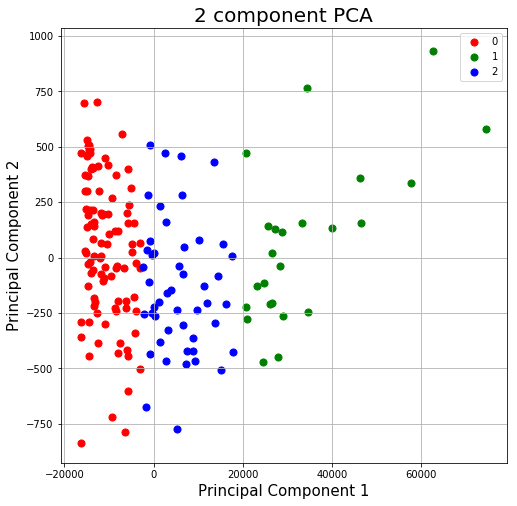

In [313]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1,2]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = b['cluster ID'] == target
    ax.scatter(b.loc[indicesToKeep, 'principal component 1']
               , b.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Ordonnés = Consommation de protéines
Abcisses = Potentiel d'achat

## Réaliser un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, choisissez-en une et testez son adéquation à une loi de votre choix

Ici les variables sont quantitatives continues (test de Kolmogorov Smirnov), nous choisirons la variable PIB par habitant

In [316]:
df_base_cah_group_pib.head(10)

,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
1,Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
2,Albanie,10504.1,0.347881,3188.0,111.37,53.461435
3,Algérie,13253.2,1.886596,3293.0,91.92,27.241079
4,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
5,Angola,6185.0,3.126651,2474.0,57.27,32.268203
6,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
7,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
8,Argentine,19482.2,0.873756,3226.0,102.60,65.233918
9,Arménie,7727.9,0.269451,2924.0,90.06,48.123473


In [317]:
ks_2samp(df_base_cah_group_pib["PiB par habitant (PPA)"],list(np.random.normal(np.mean(df_base_cah_group_pib["PiB par habitant (PPA)"]), np.std(df_base_cah_group_pib["PiB par habitant (PPA)"]), 1000)))

Ks_2sampResult(statistic=0.17, pvalue=0.00036027493638924154)

Conclusion : La quantité est très petite, on rejette H1 (F différent de F0) et on garde H0. La variable PIB par habitant suit la loi normale.

## Réaliser un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Trouvez une variable (parmi les 4 proposées ou une autre variable de votre choix) qui soit gaussienne sur ces 2 clusters (en réalisant un test d'adéquation), puis effectuez le test de comparaison.

In [331]:
cluster_0 = df_base_with_centroid2[df_base_with_centroid2['cluster ID'] == 0]['PiB par habitant (PPA)']
cluster_1 = df_base_with_centroid2[df_base_with_centroid2['cluster ID'] == 1]['PiB par habitant (PPA)']


On teste tout d’abord l’égalité des variances à l’aide de la commande :

In [332]:
bartlett(cluster_0,cluster_1)

BartlettResult(statistic=84.40849017198593, pvalue=4.024160129999987e-20)

La p-valeur valant 4×10-20, on ne rejette donc pas l’égalité des variances au niveau de test 5%.

On teste ensuite l’égalité des moyennes à l’aide de la commande :

In [333]:
ttest_ind(cluster_0,cluster_1, equal_var=True)

Ttest_indResult(statistic=-27.687665131845012, pvalue=3.404754768374234e-54)

On obtient une p-valeur égale à environ 3.4×10−54. On constate donc que l’hypothèse d’égalité des longueurs moyennes de pétales est (très facilement) rejetée à un niveau de test de 5%.